In [17]:
#Import libraries
import pandas as pd
import numpy as np
# import sklearn
from sklearn.metrics import plot_confusion_matrix as matrix
import matplotlib.pyplot as plt


#Read in Data;  Class 2 for benign 4 for malignant
cancer_data = pd.read_csv('Breast_Cancer_data.csv')
# data_filtered = cancer_data[cancer_data['Bare Nuclei'] != '?'] #remove rows with missing data
# data_filtered = data_filtered.astype('int64') #converts the object to int64

In [34]:
# can_dat = cancer_data.copy(deep = True) #make a deep copy so the orginal data is not overwritten
def update_missing_data(Bare,Class): #function that if the Class is 2 make the Bare Nuclei value 1, and if Class is 4 make Bare Nuclei value 8
  if Bare=='?' and Class == 2:
    Bare = 1 #avverage of Class 2, rounded
  elif Bare=='?' and Class == 4:
    Bare = 8 #average of Class 4, rounded
  else:
    Bare = Bare
  return Bare
cancer_data['Bare Nuclei'] = cancer_data.apply(lambda x: update_missing_data(x['Bare Nuclei'], x['Class']), axis =1)
cancer_data = cancer_data.astype('int64') #converts Vare Nuclei class from objects to int64
# cancer_data.dtypes

In [16]:
p = cancer_data.copy(deep=True) #make deep copy 
# p.describe

In [40]:
labels = p['Class']
features = ["Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses"]
# features
# labels

In [56]:
#get dataframe of just features
#get all rows and just features columns
X = p.loc[:,features]
Y = p["Class"]
Y = Y.astype('int')

19
[0.9342243143675808, 0.9384835479256081, 0.9413793103448276, 0.9342034943473794, 0.9371008939974458, 0.9384271284271284, 0.9414184952978057, 0.9485884485884486, 0.9542443064182194, 0.9312996031746031, 0.9428453146308202, 0.9356555394291244, 0.9341399416909623, 0.9499845821769967, 0.9444371035940804, 0.9442850310856049, 0.9428699955015745, 0.9458274063537221, 0.9471008403361344]


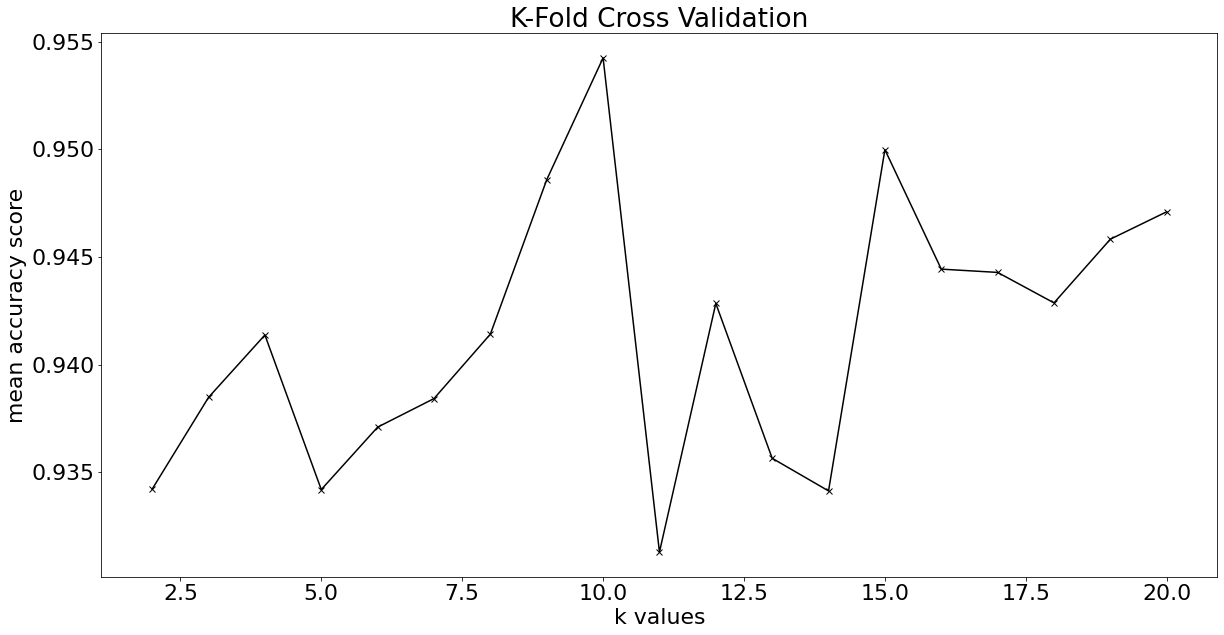

In [76]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score
#Finally, create a scorer by calling make_scorer using the score function precision_score and pass the extra parameter pos_label="donated".

#set how many folds/combinations you want
k=5
clf = tree.DecisionTreeClassifier(random_state=0, criterion="gini")
#X is all features and Y is all labels, cv performs the split
#scores = cross_val_score(clf, X, Y, cv=k,scoring='precision_macro')
scores = cross_val_score(clf, X, Y, cv=k)

mean_scores = []
for k in range(2,21):
  scores = cross_val_score(clf, X, Y, cv=k)
  mean_scores.append(scores.mean())
# scores = cross_val_score(clf, X, Y, cv=k)

#clf = clf.fit(X, Y)
# fig = plt.figure()
# # ax = plt.axes()

k_vals = list(range(2,21))
print(len(k_vals))
print(mean_scores)

# print(len(y1))
plt.figure(figsize=[20,10])
plt.plot(k_vals, mean_scores, '-kx') 

plt.xlabel("k values")
plt.ylabel("mean accuracy score")
plt.title("K-Fold Cross Validation")

plt.show()

In [46]:
#compute the mean accuracy, and the margin of error at 95% confidence interval. I.e., we are 95% confident that the mean
#accuracy is 68% +- 2 standard deviations/sqrt(k) (the more deviations the more confident we can be, widening the beam/net).
print("Accuracy = %0.2f%% (+/- %0.2f%%) @95%%" % (scores.mean()*100, (scores.std() * 1.96)/k**(1/2)*100))
# scores.mean()

Accuracy = 92.70% (+/- 2.23%) @95%


In [47]:
#get sorted labels for plot 
import numpy as np
sorted_ = labels.unique()
sorted_ = np.sort(sorted)
sorted_ = list(map(str, sorted))
# sorted_

Average K-Fold Score : 0.9471008403361344
model score =  0.9428571428571428
[[454   4]
 [  4 237]]
model score =  0.9214285714285714
[[451   7]
 [  4 237]]
model score =  0.9428571428571428
[[455   3]
 [  5 236]]
model score =  0.9428571428571428
[[455   3]
 [  5 236]]
model score =  0.9712230215827338
[[458   0]
 [  4 237]]


<Figure size 2160x2160 with 0 Axes>

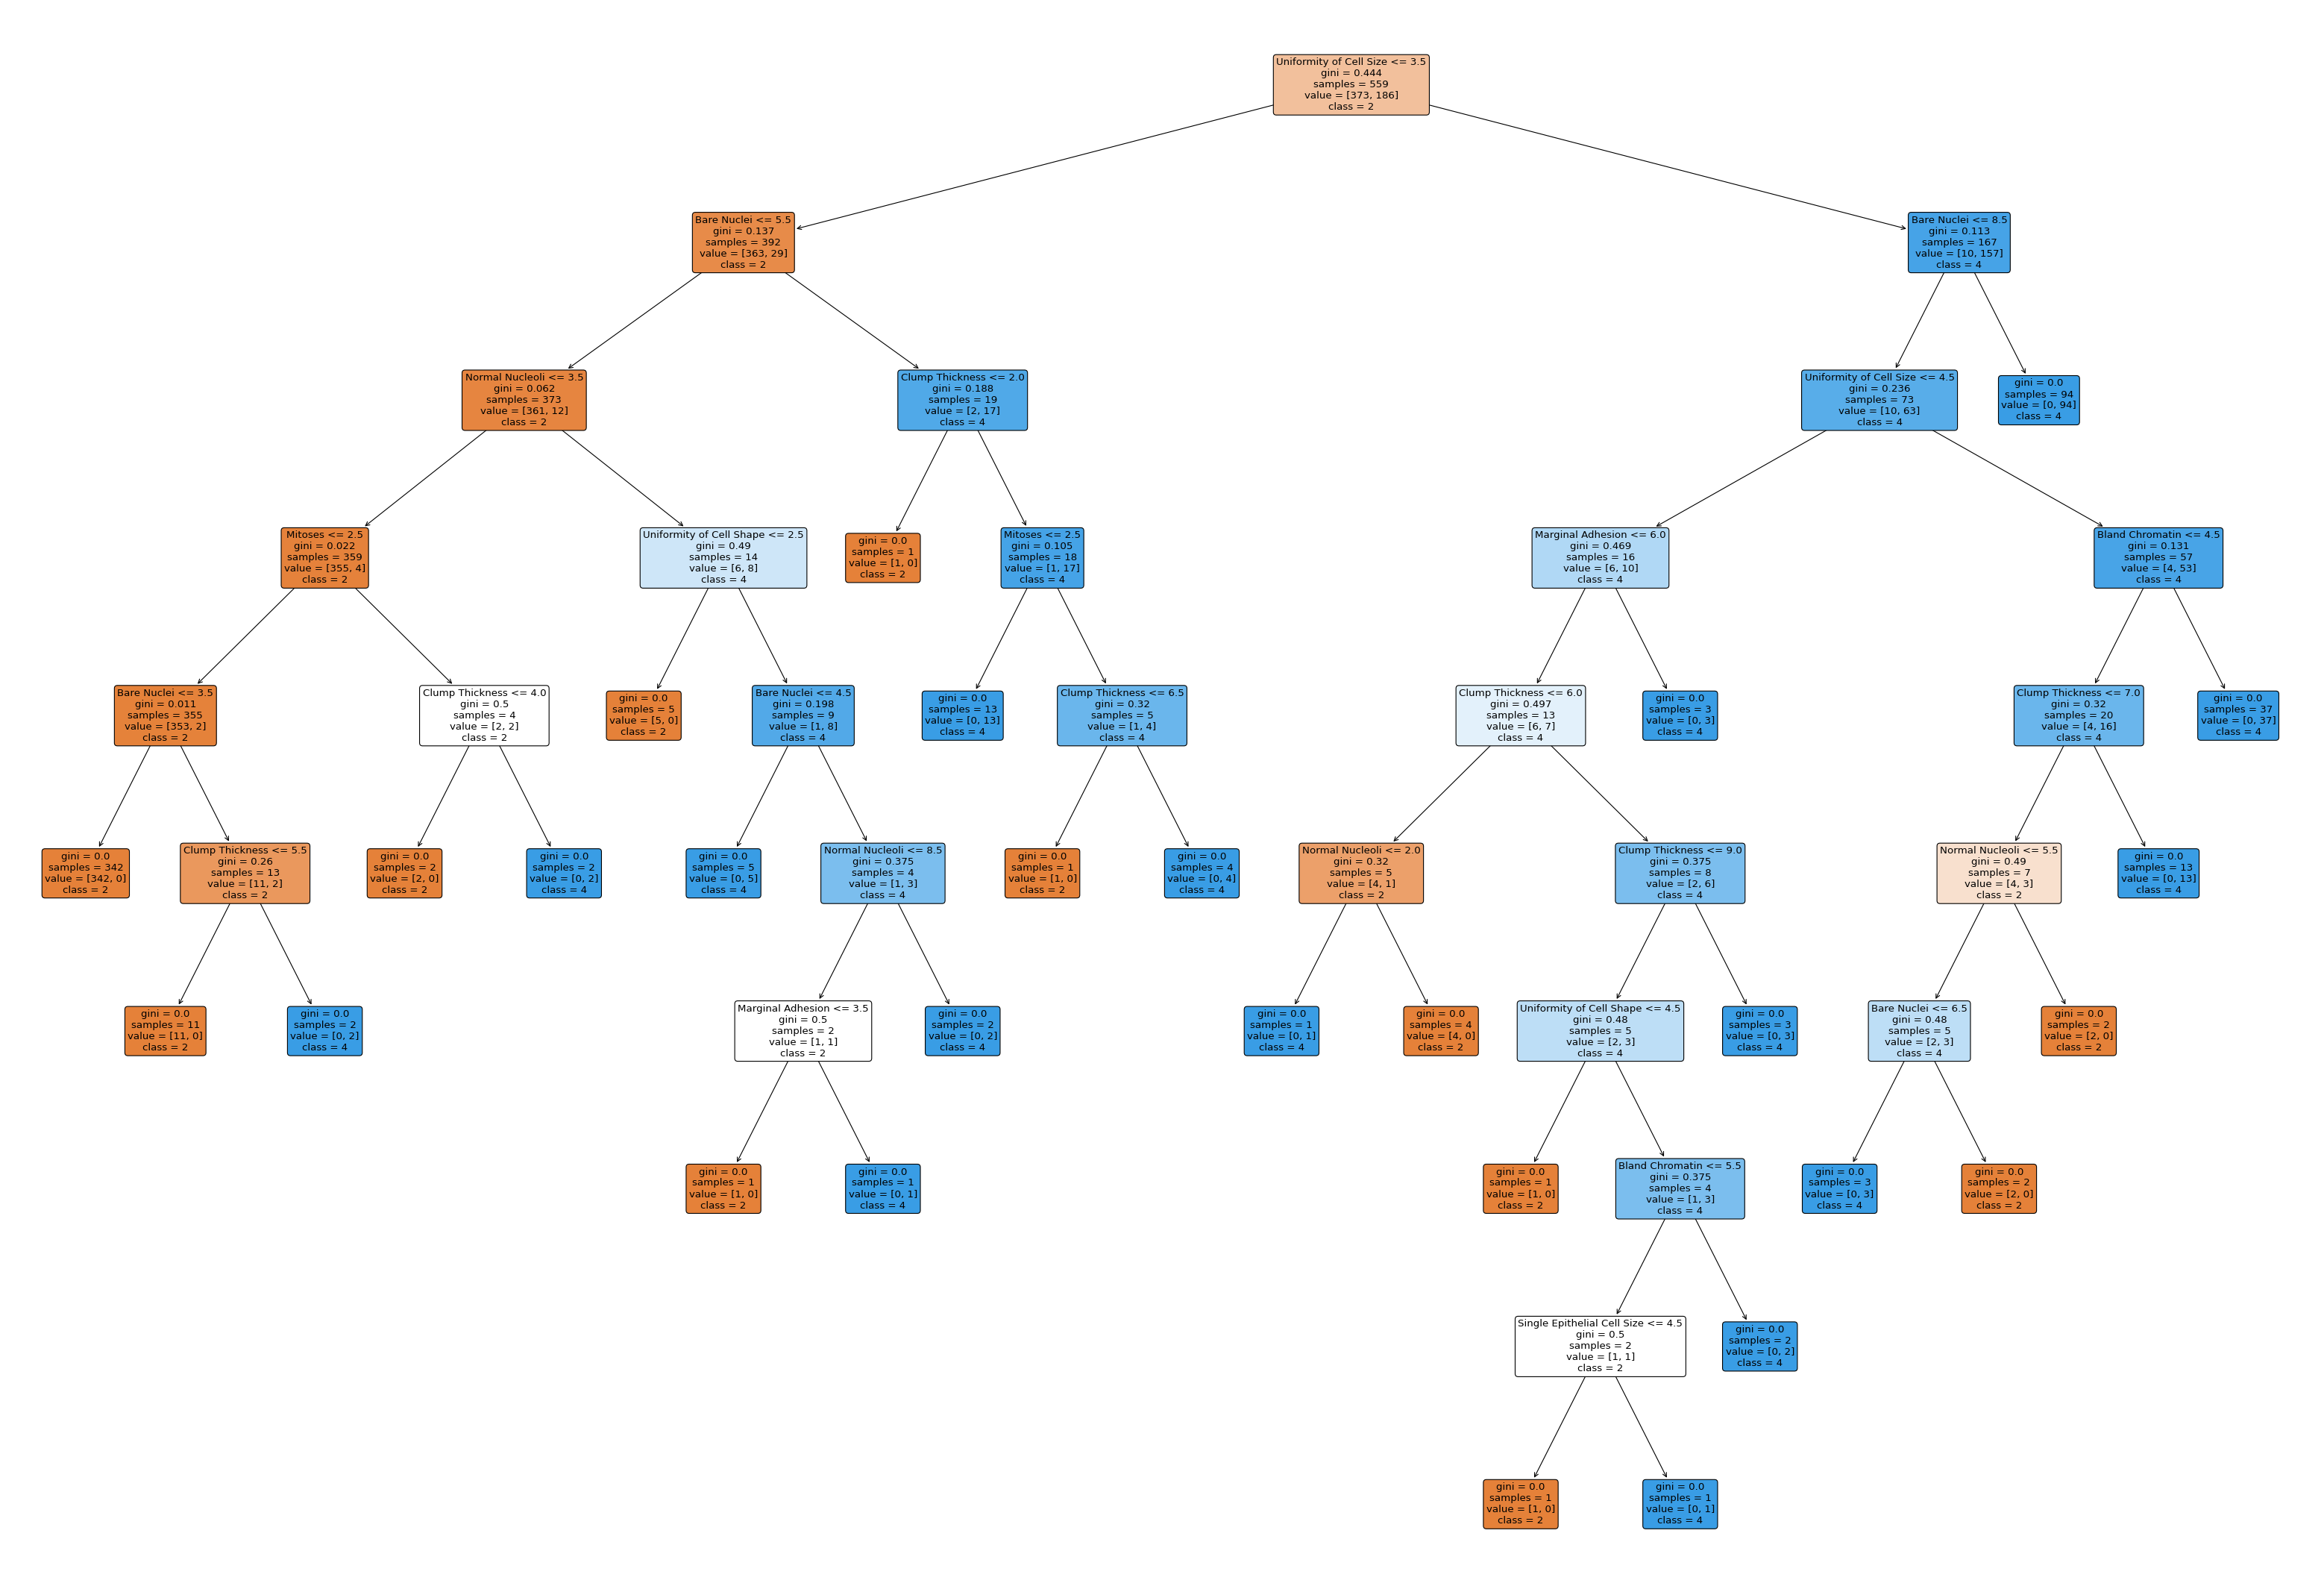

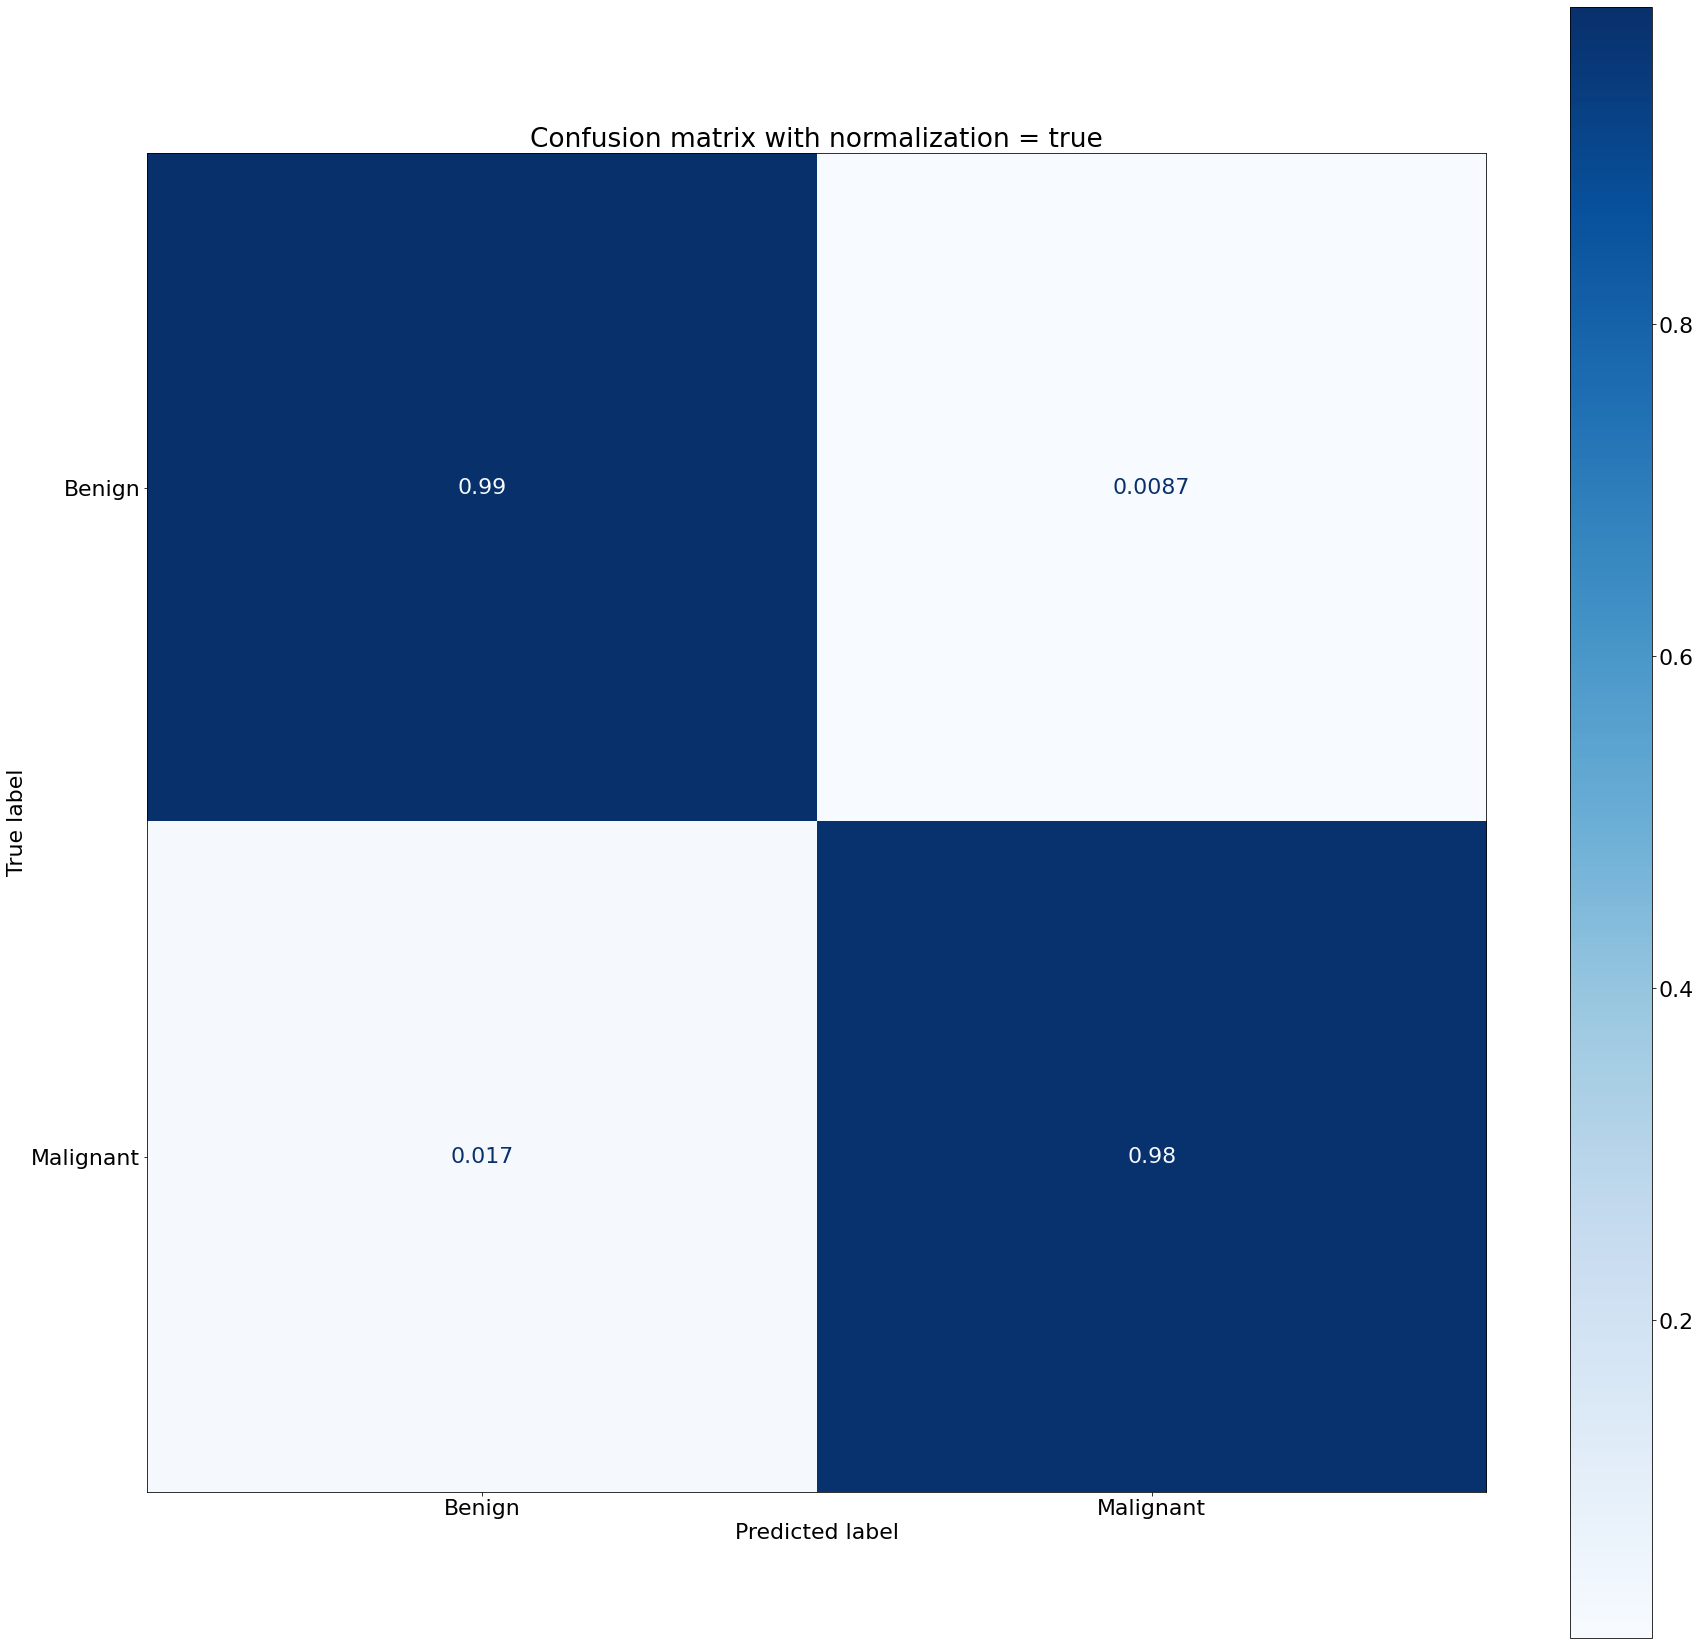

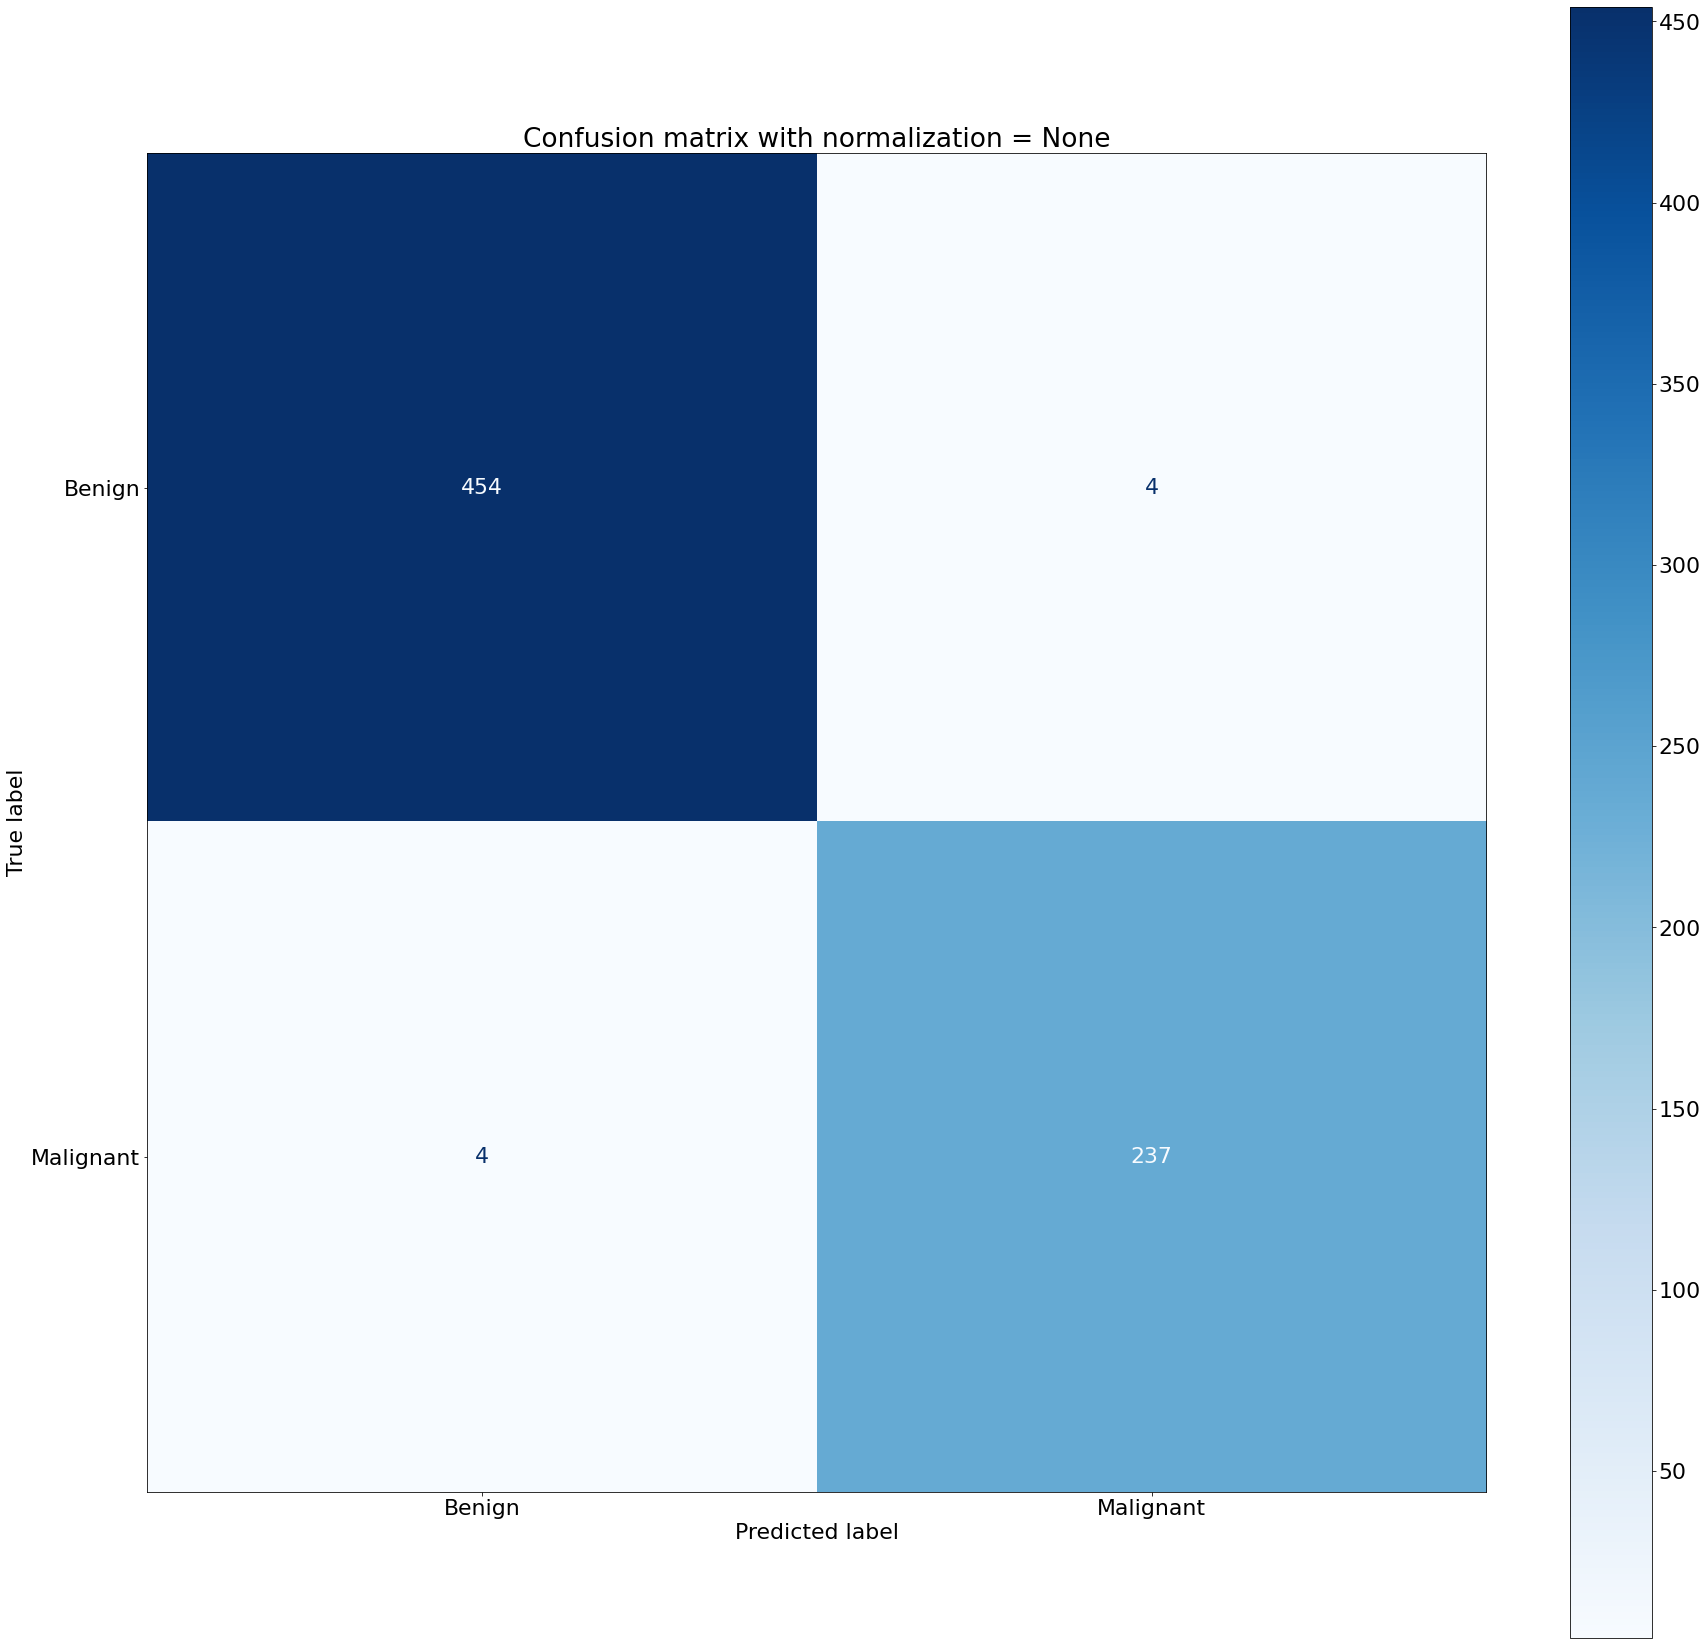

<Figure size 2160x2160 with 0 Axes>

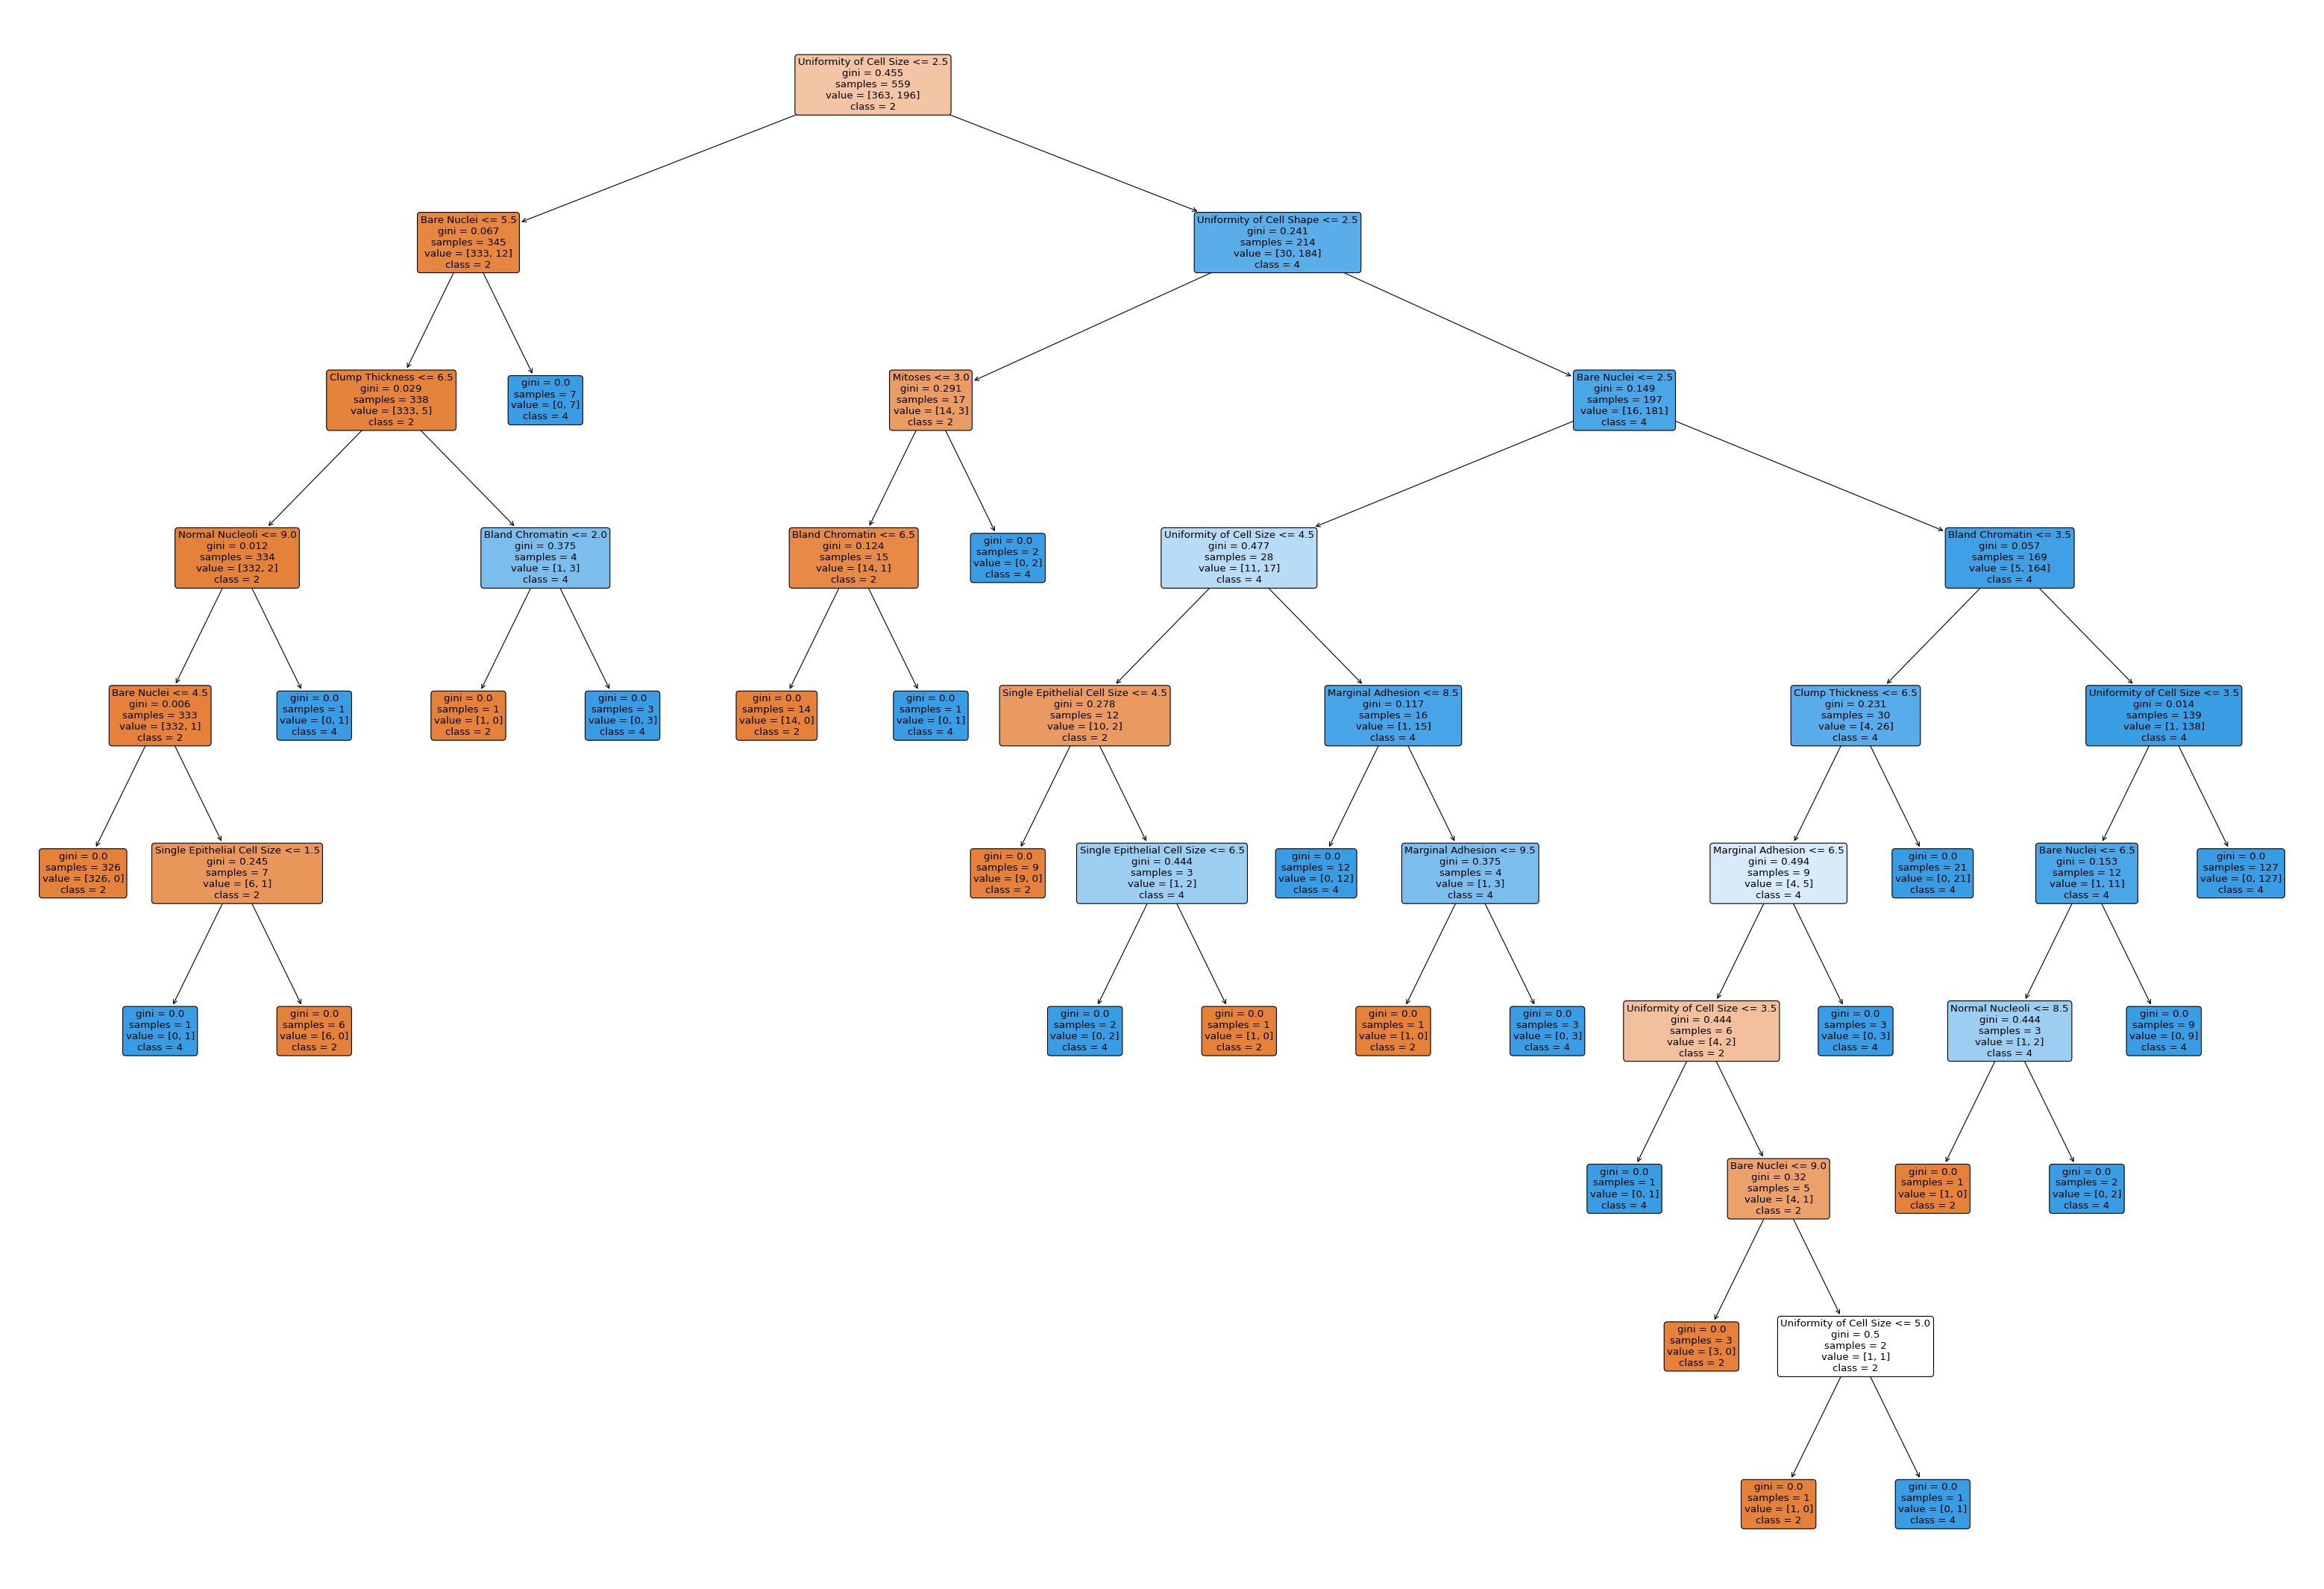

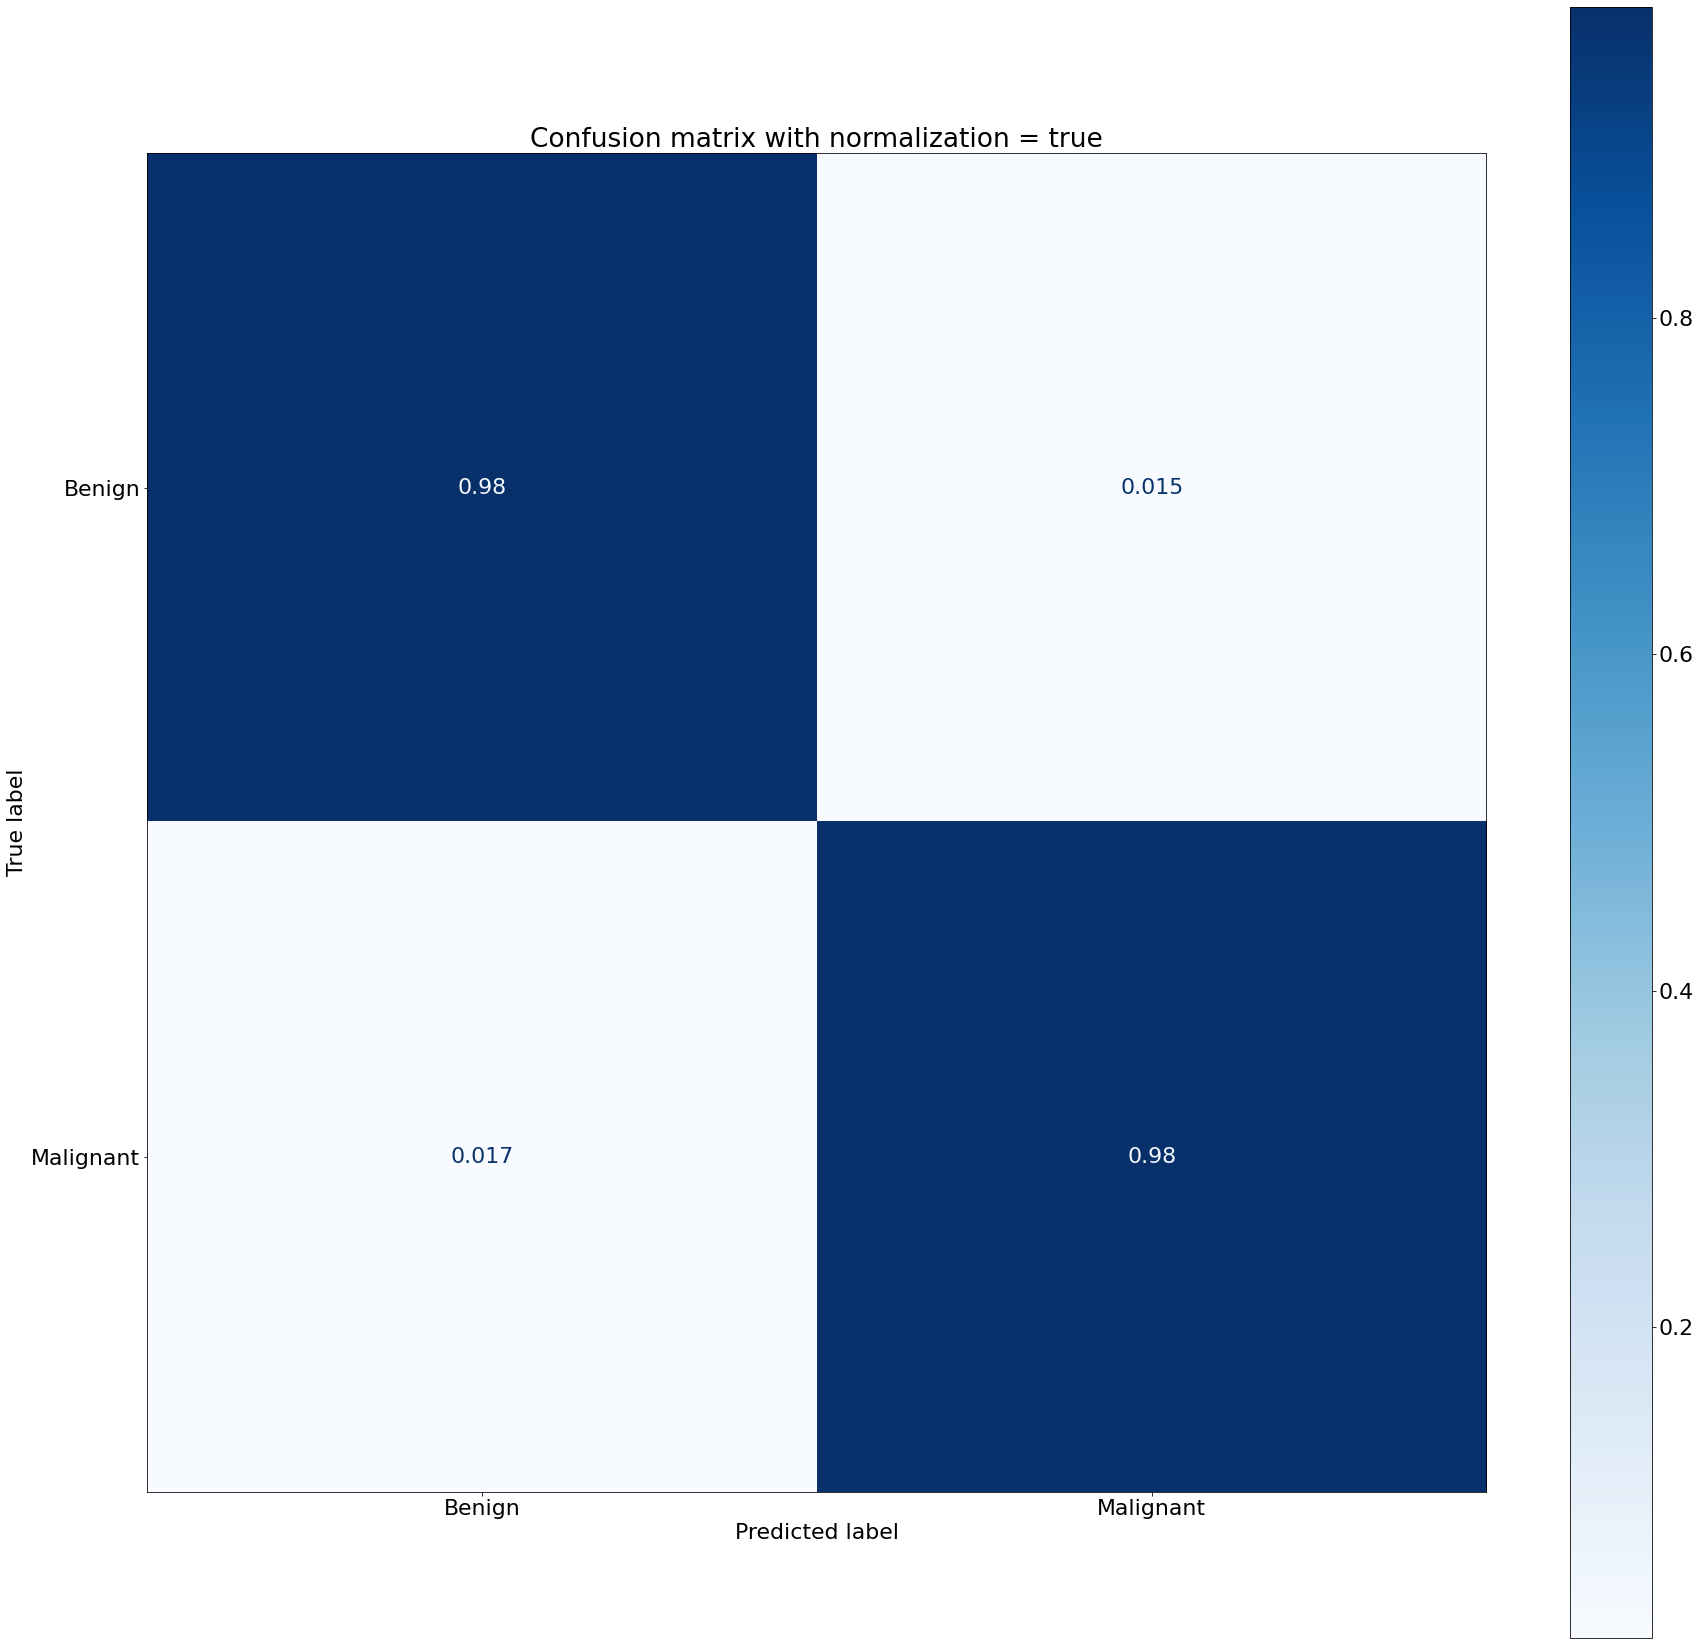

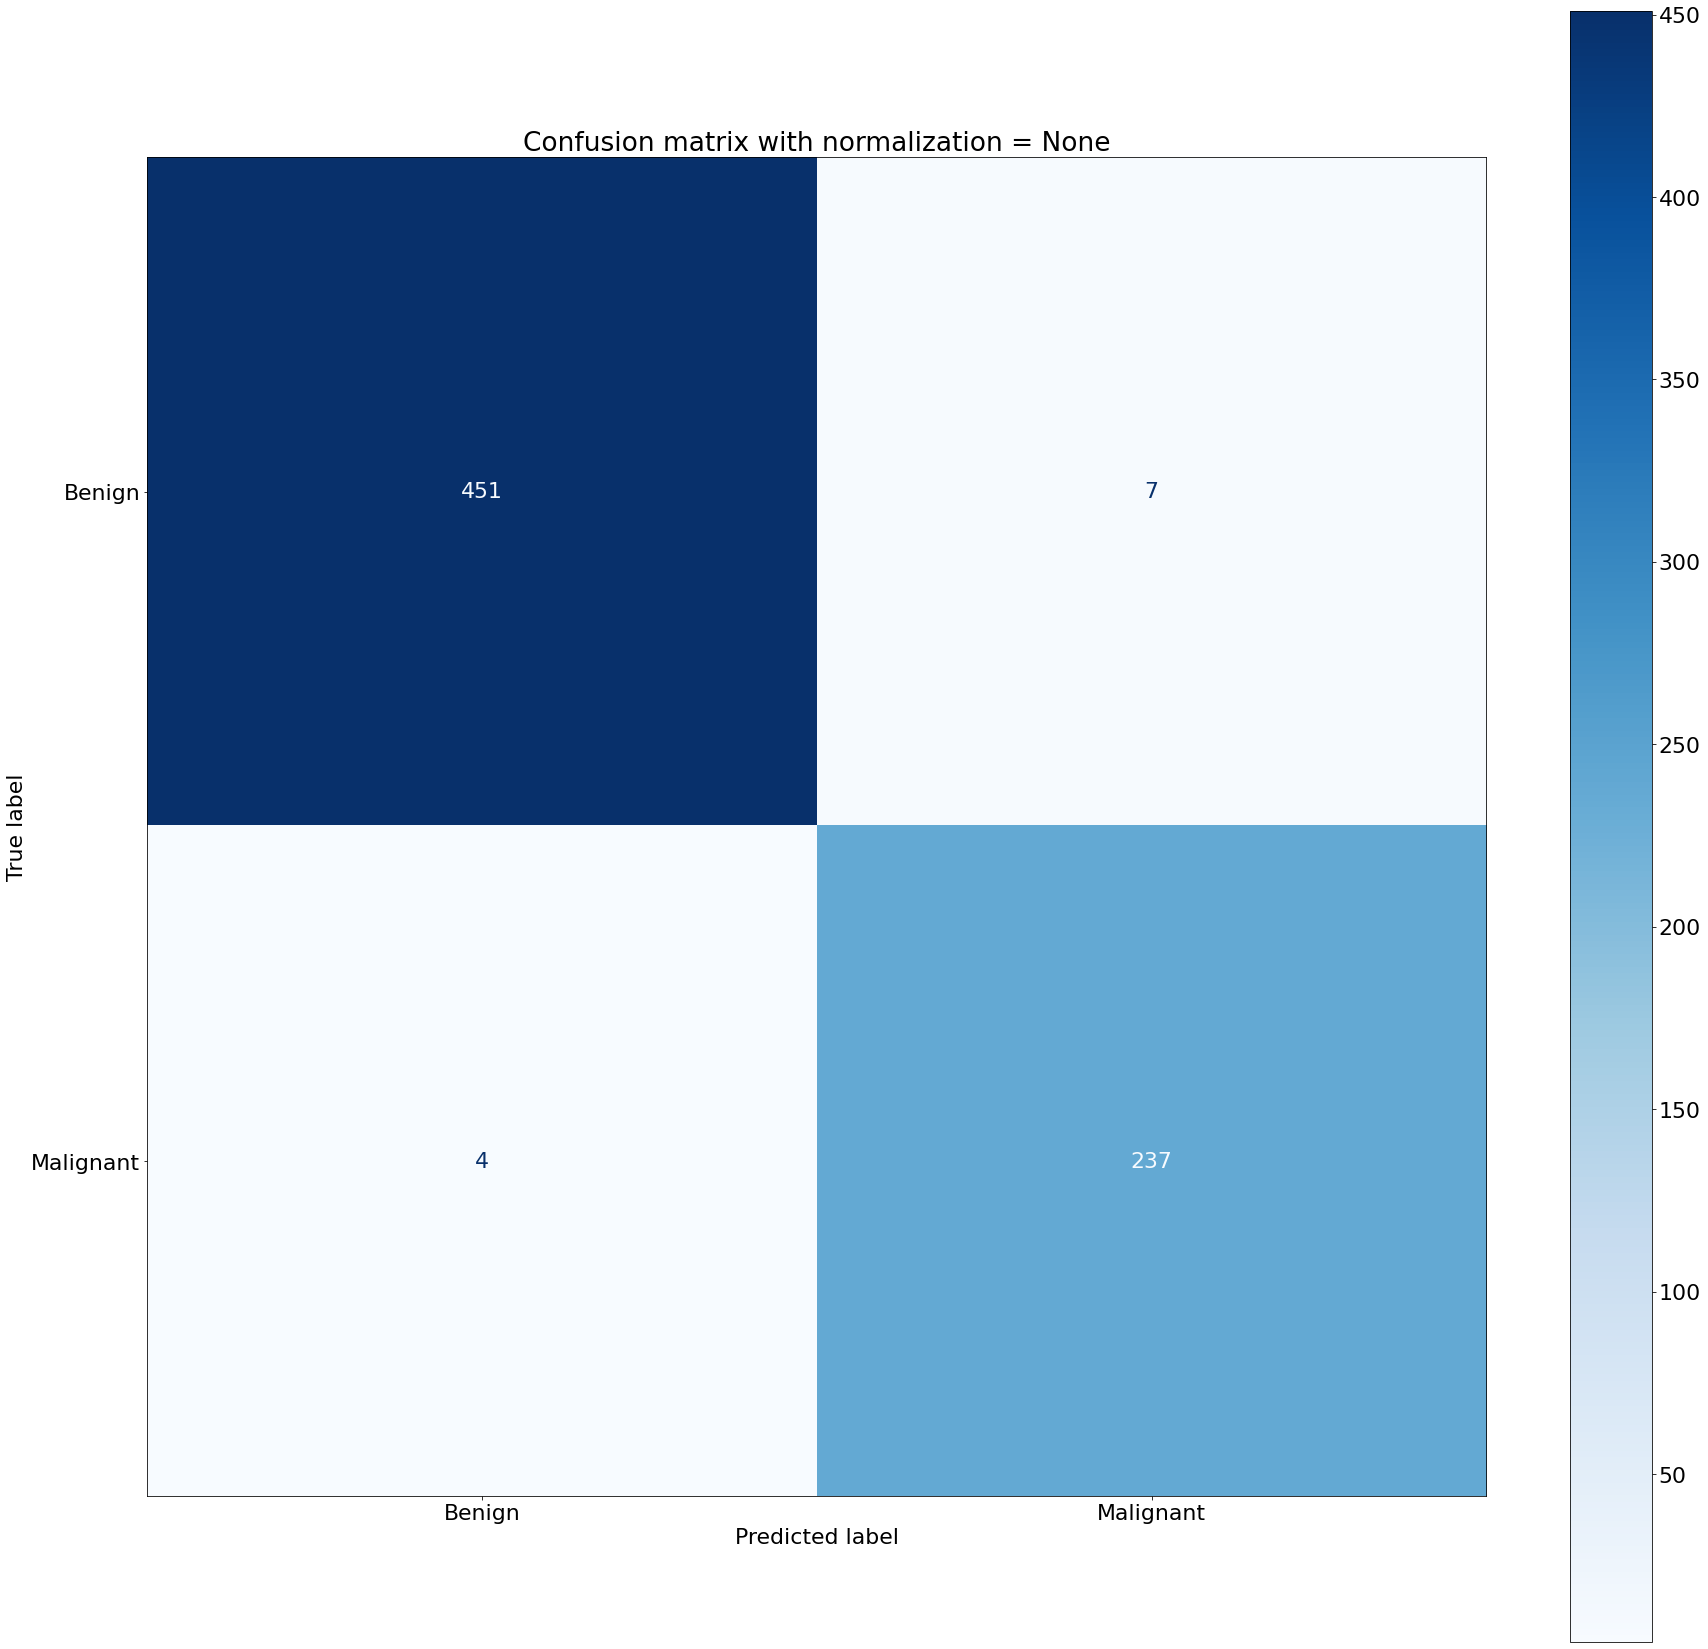

<Figure size 2160x2160 with 0 Axes>

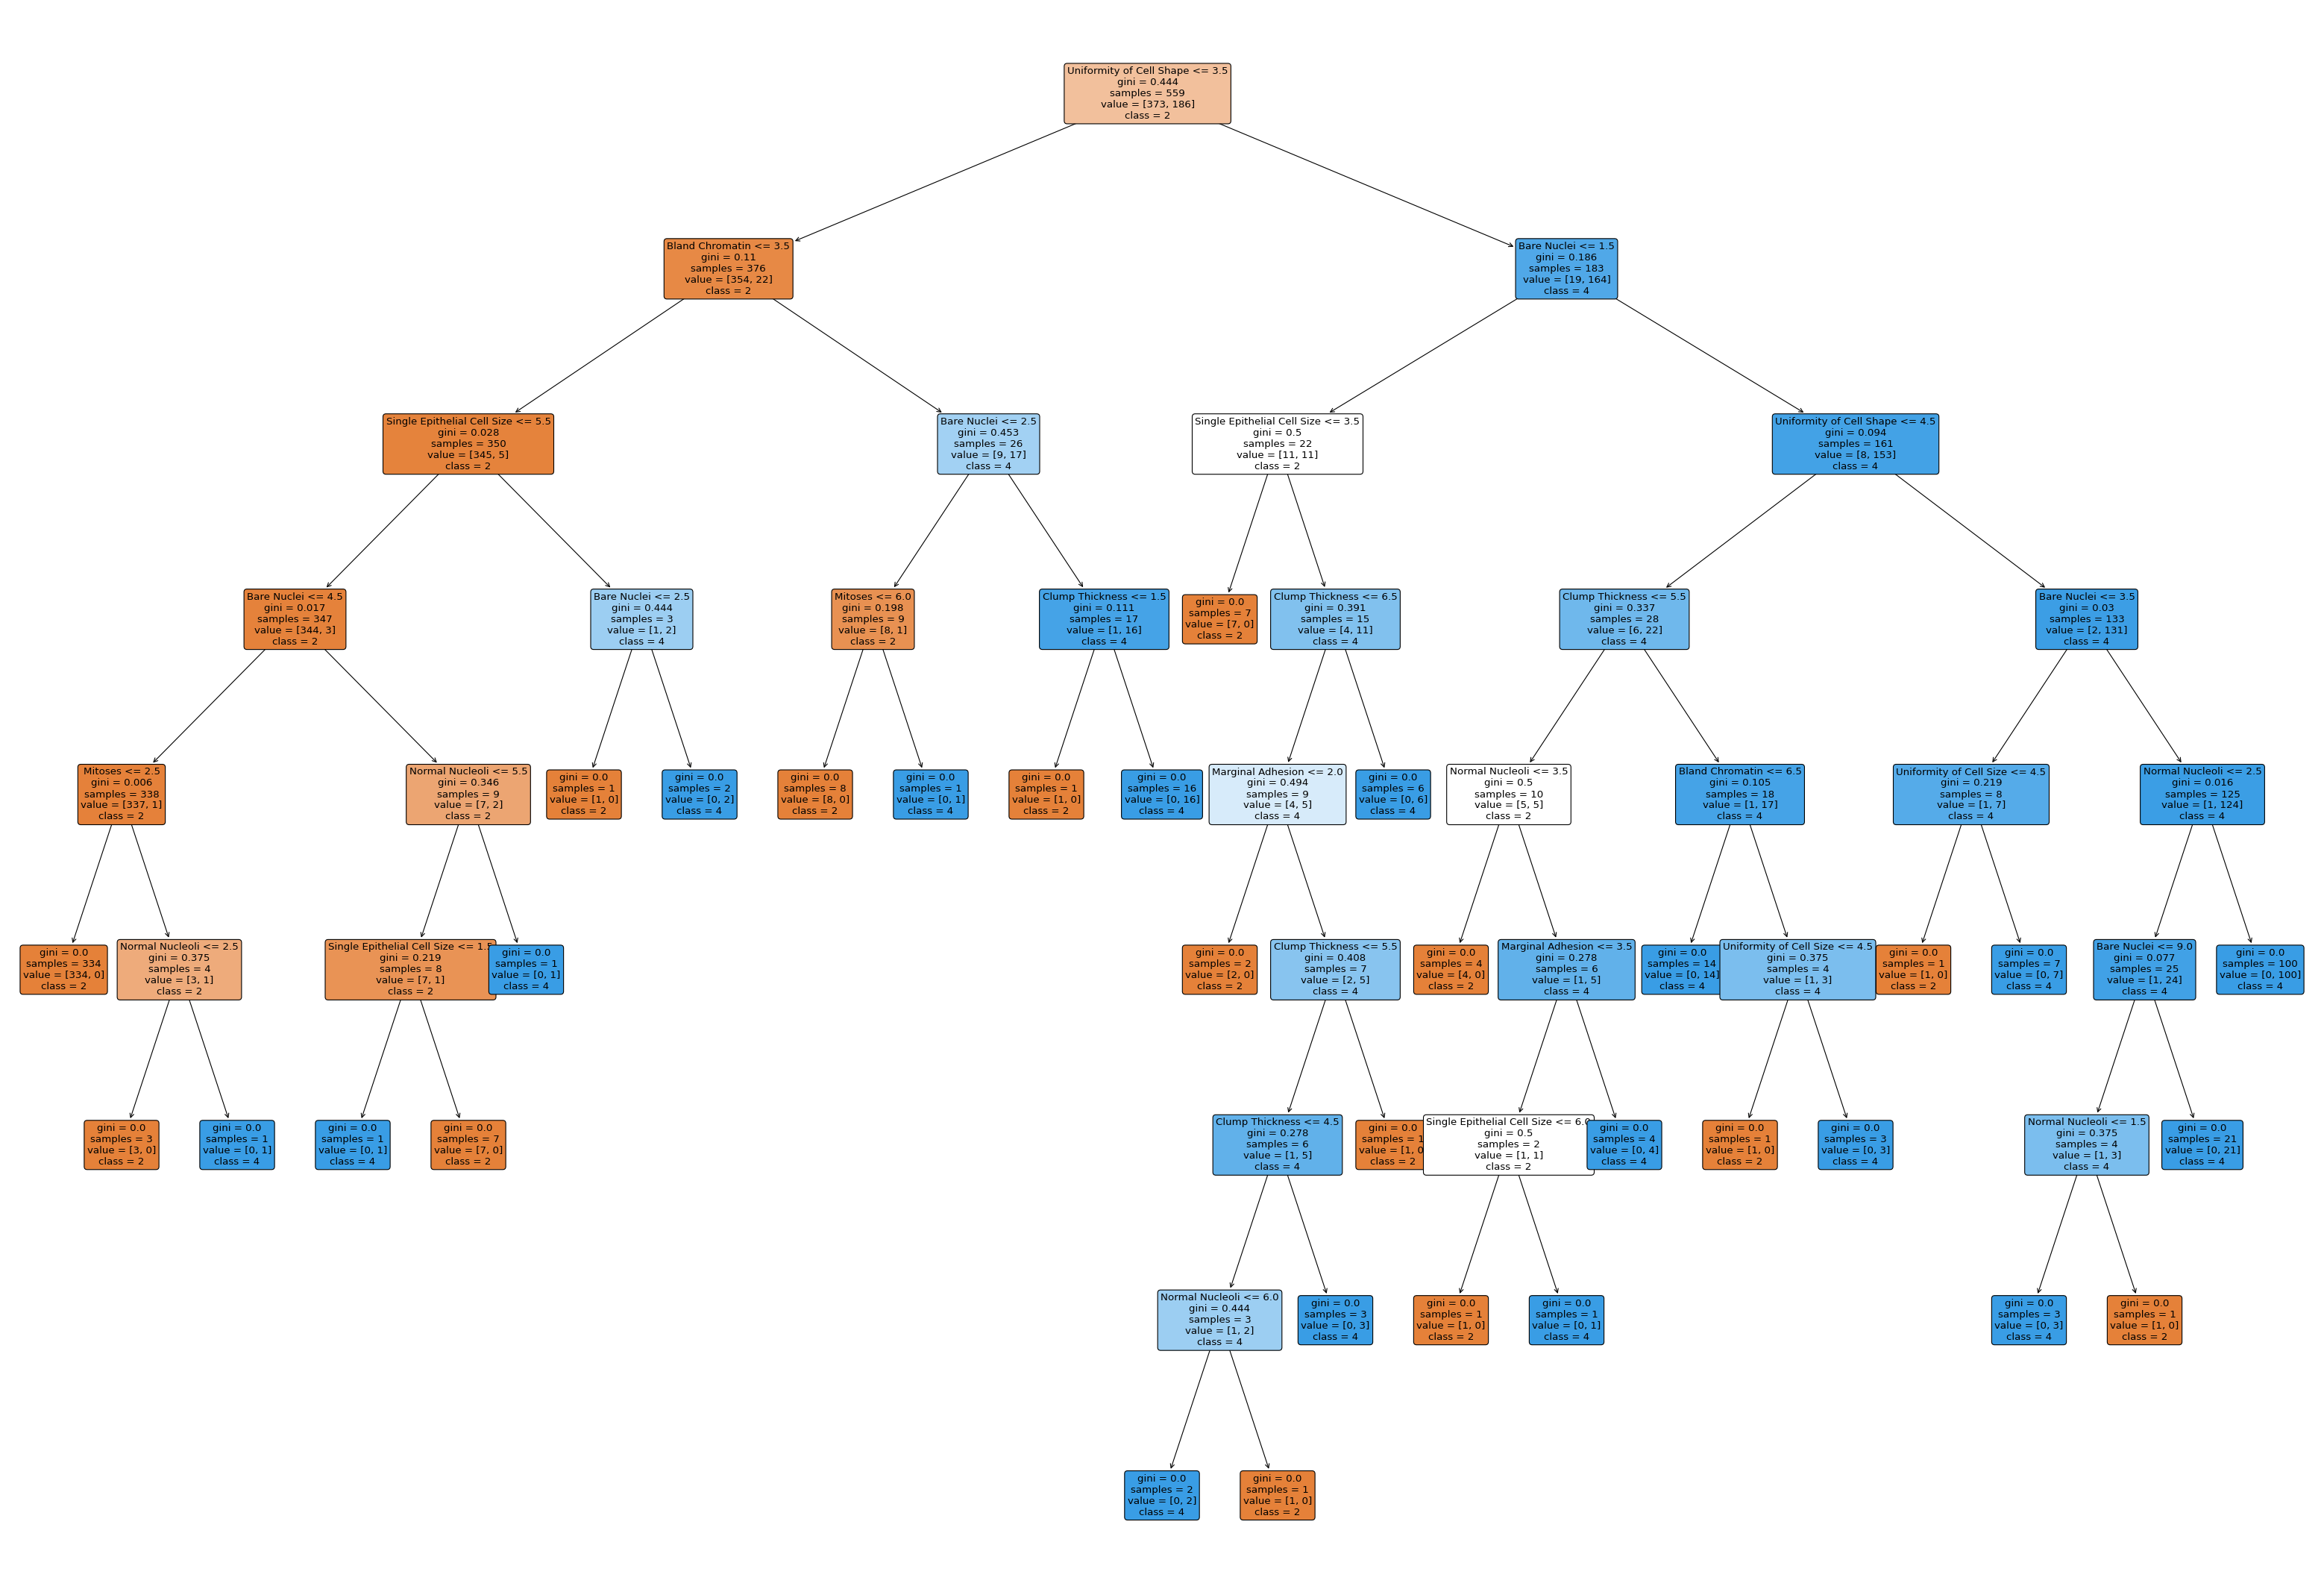

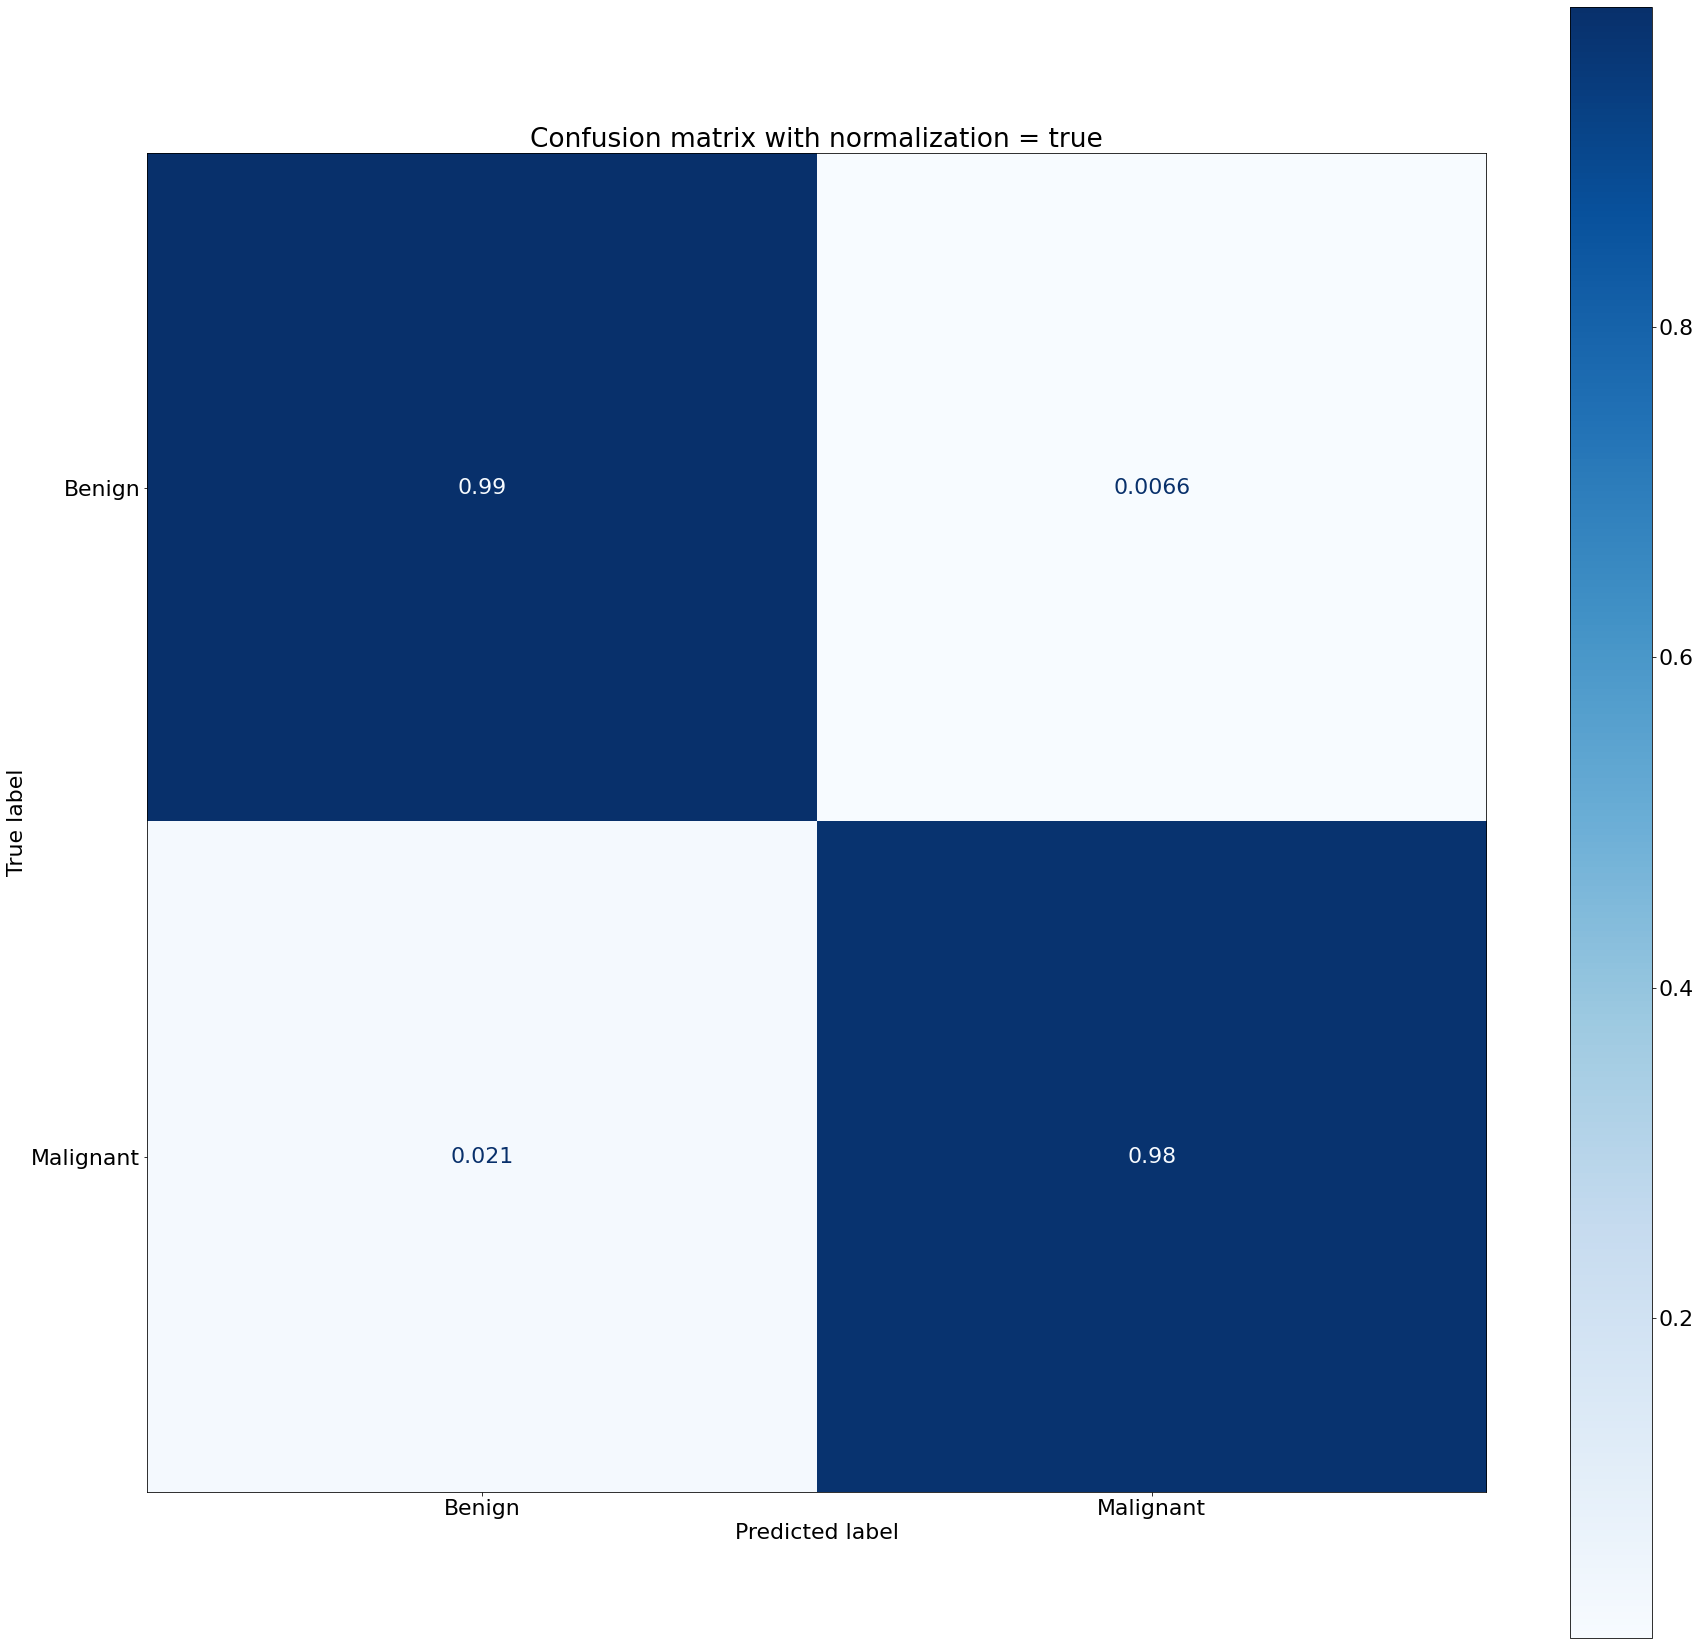

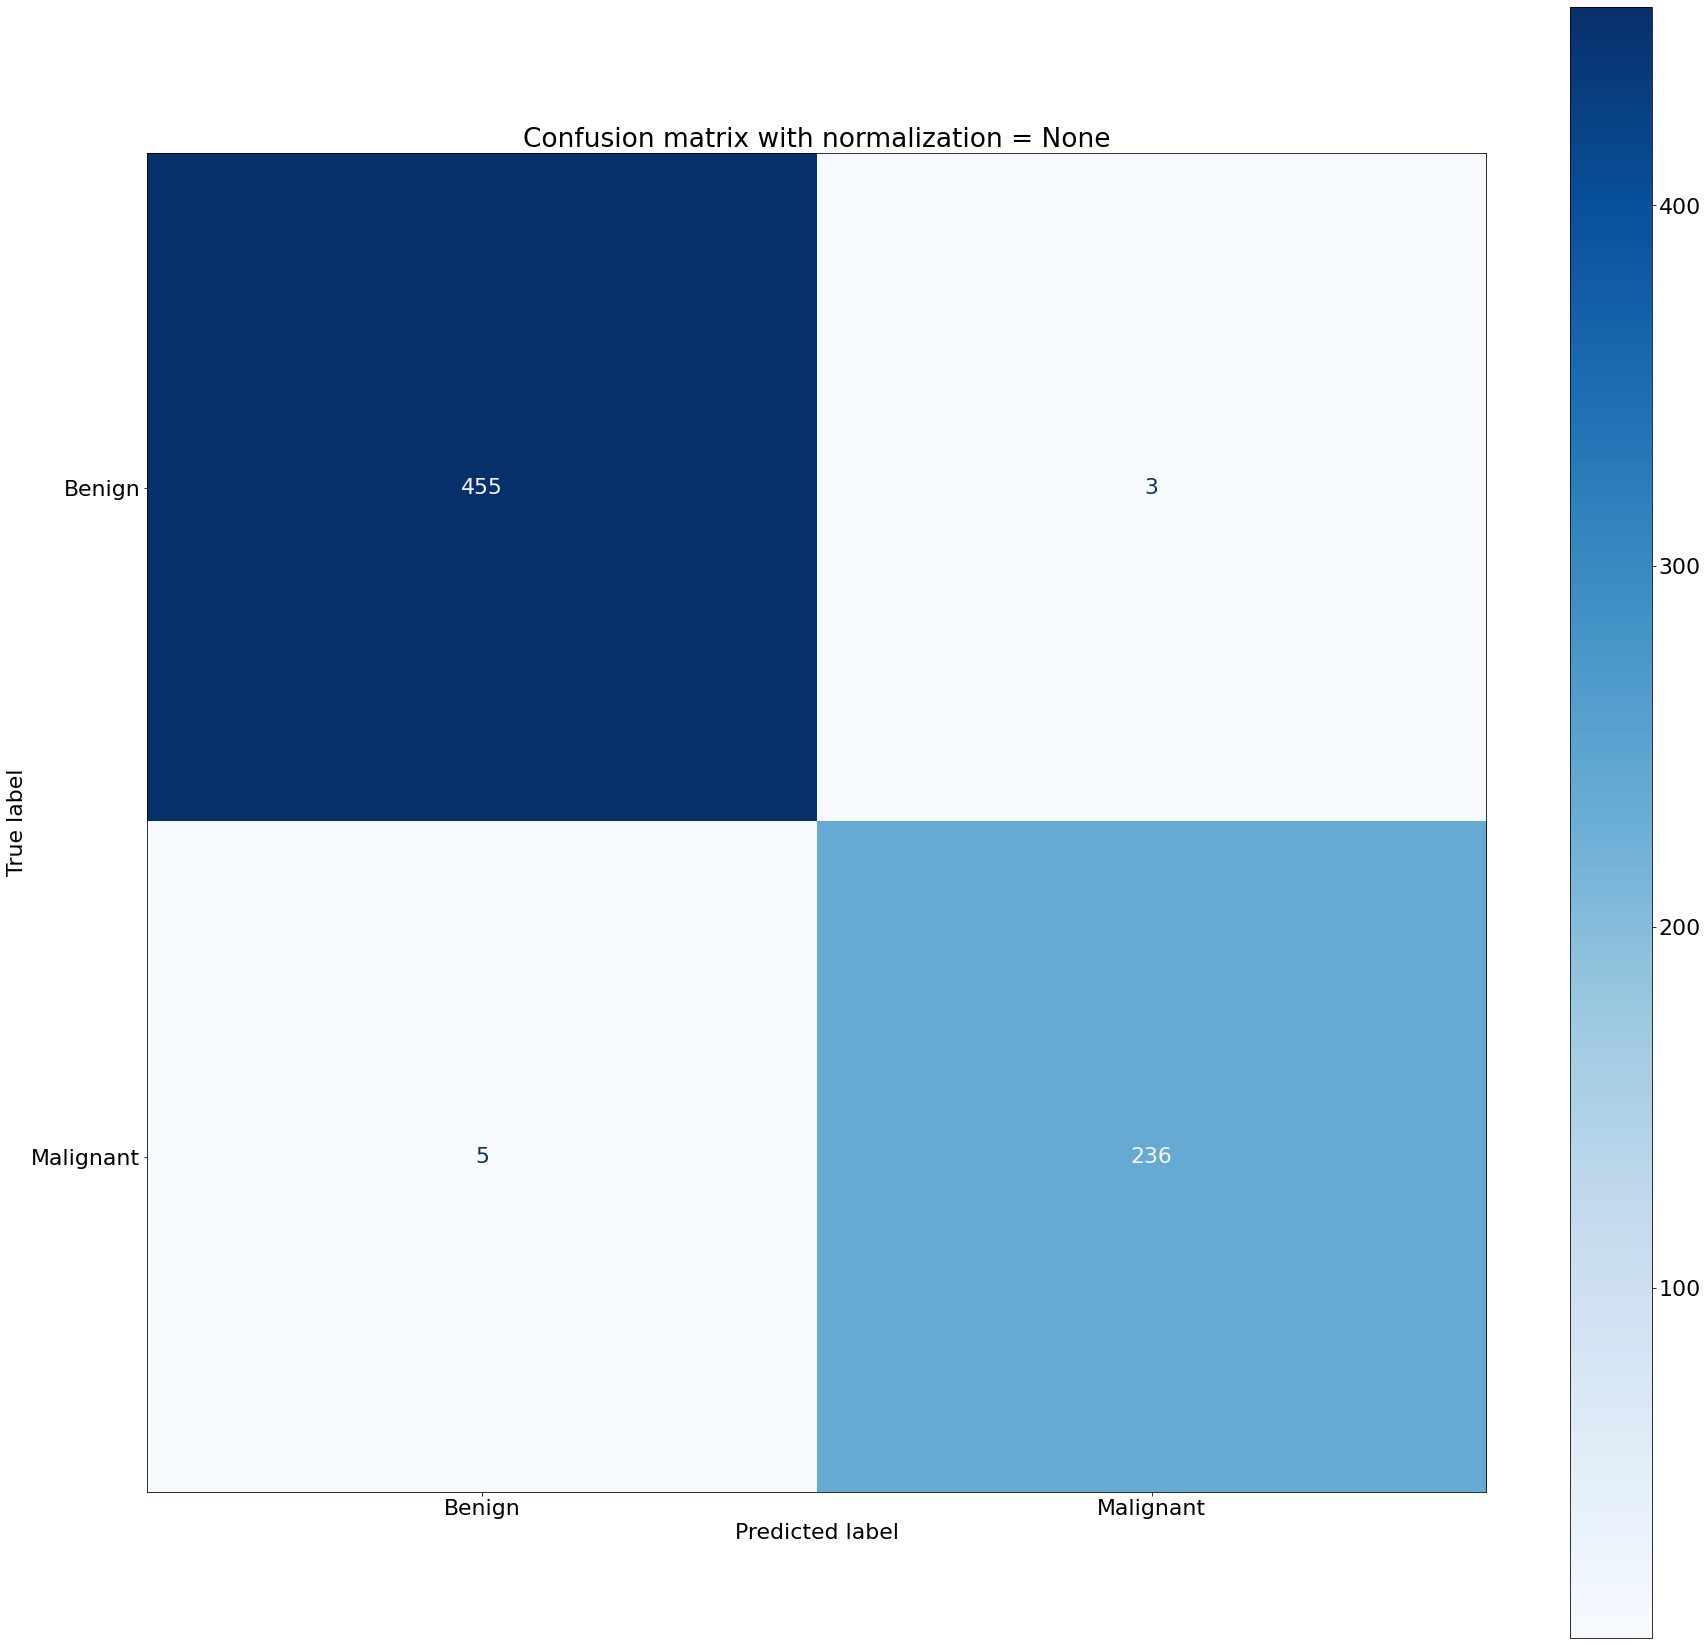

<Figure size 2160x2160 with 0 Axes>

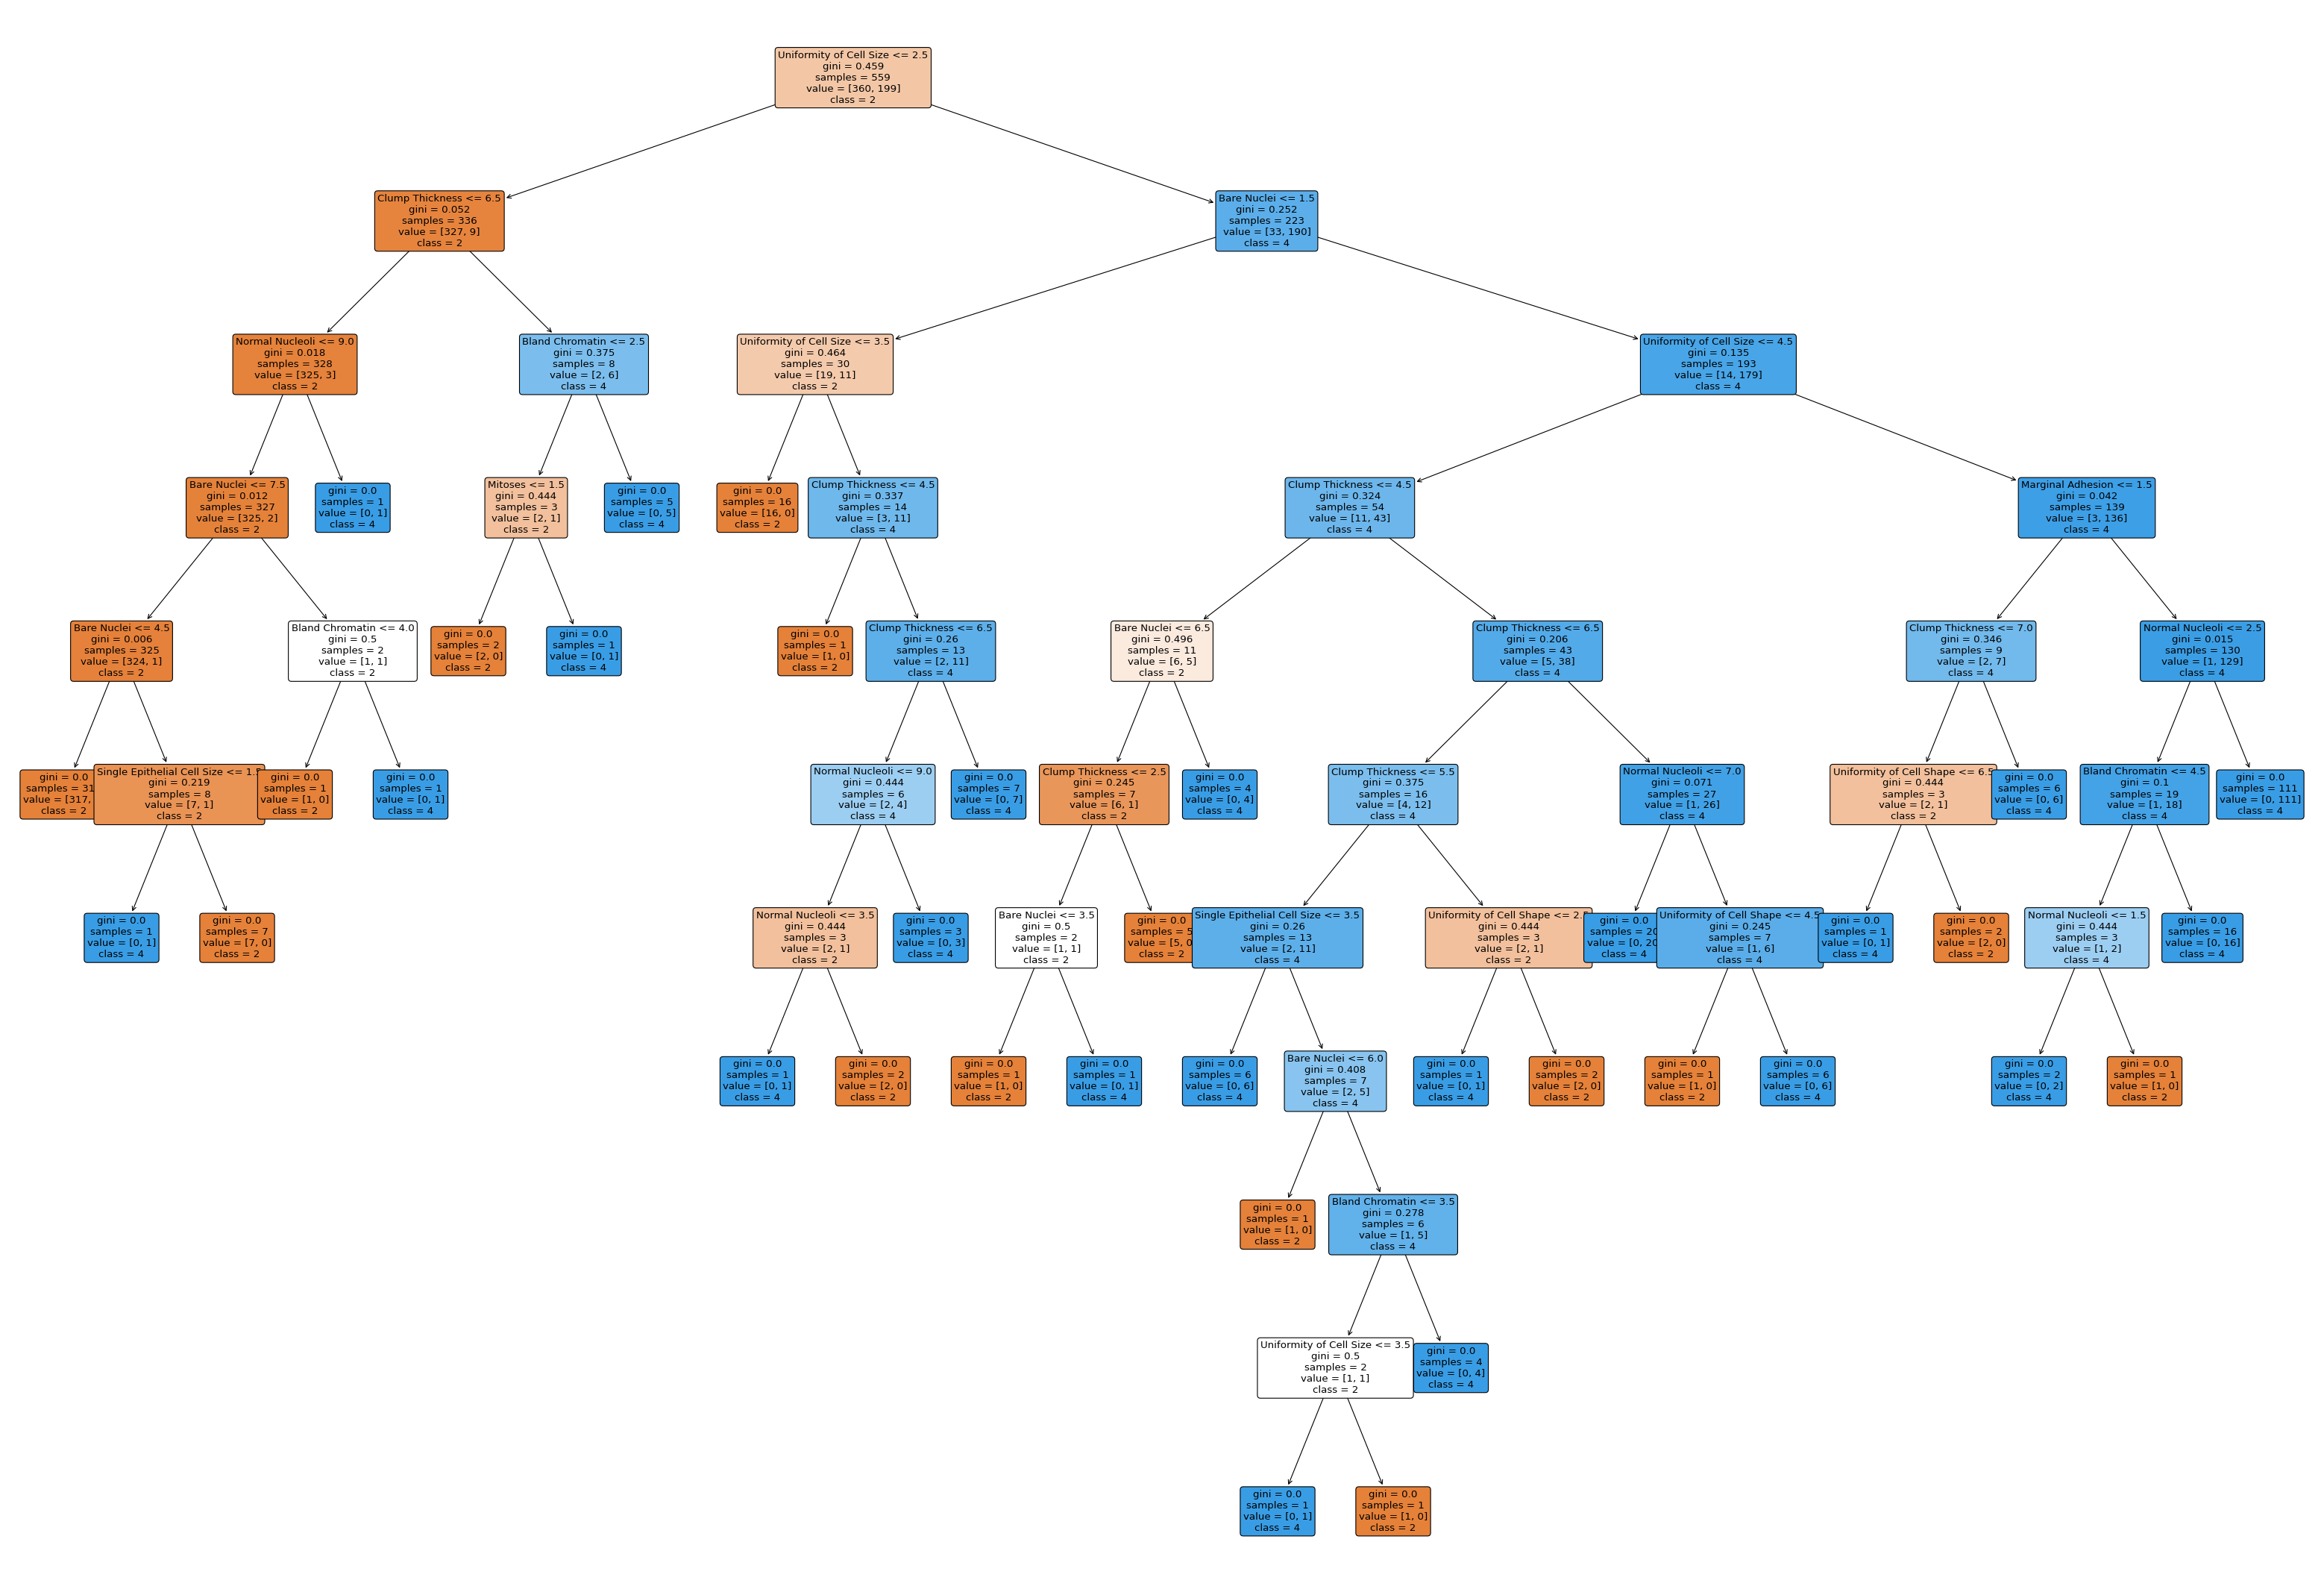

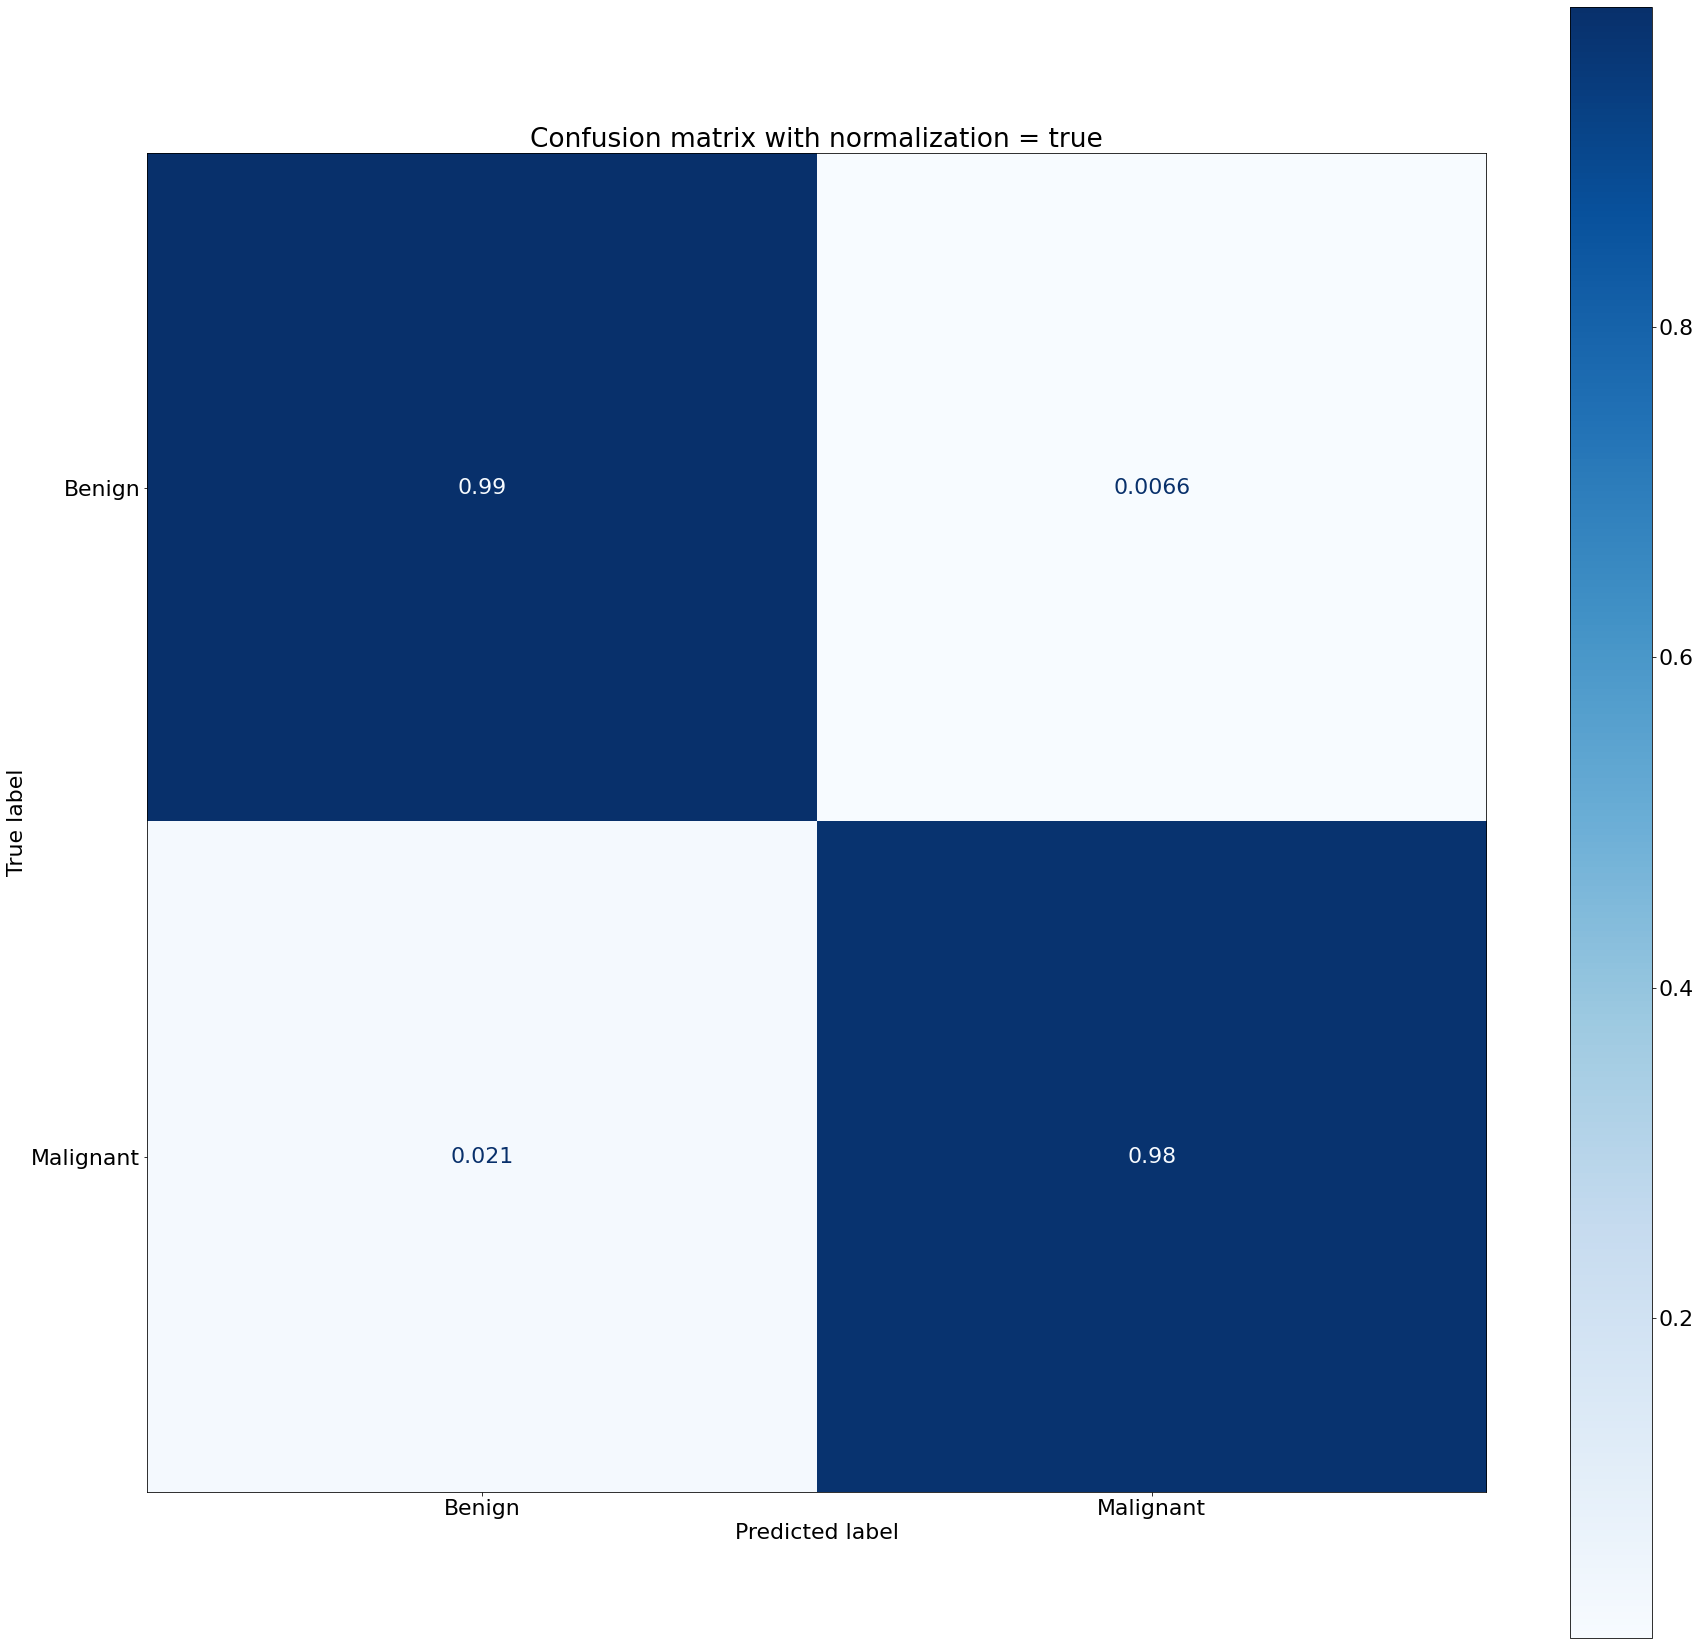

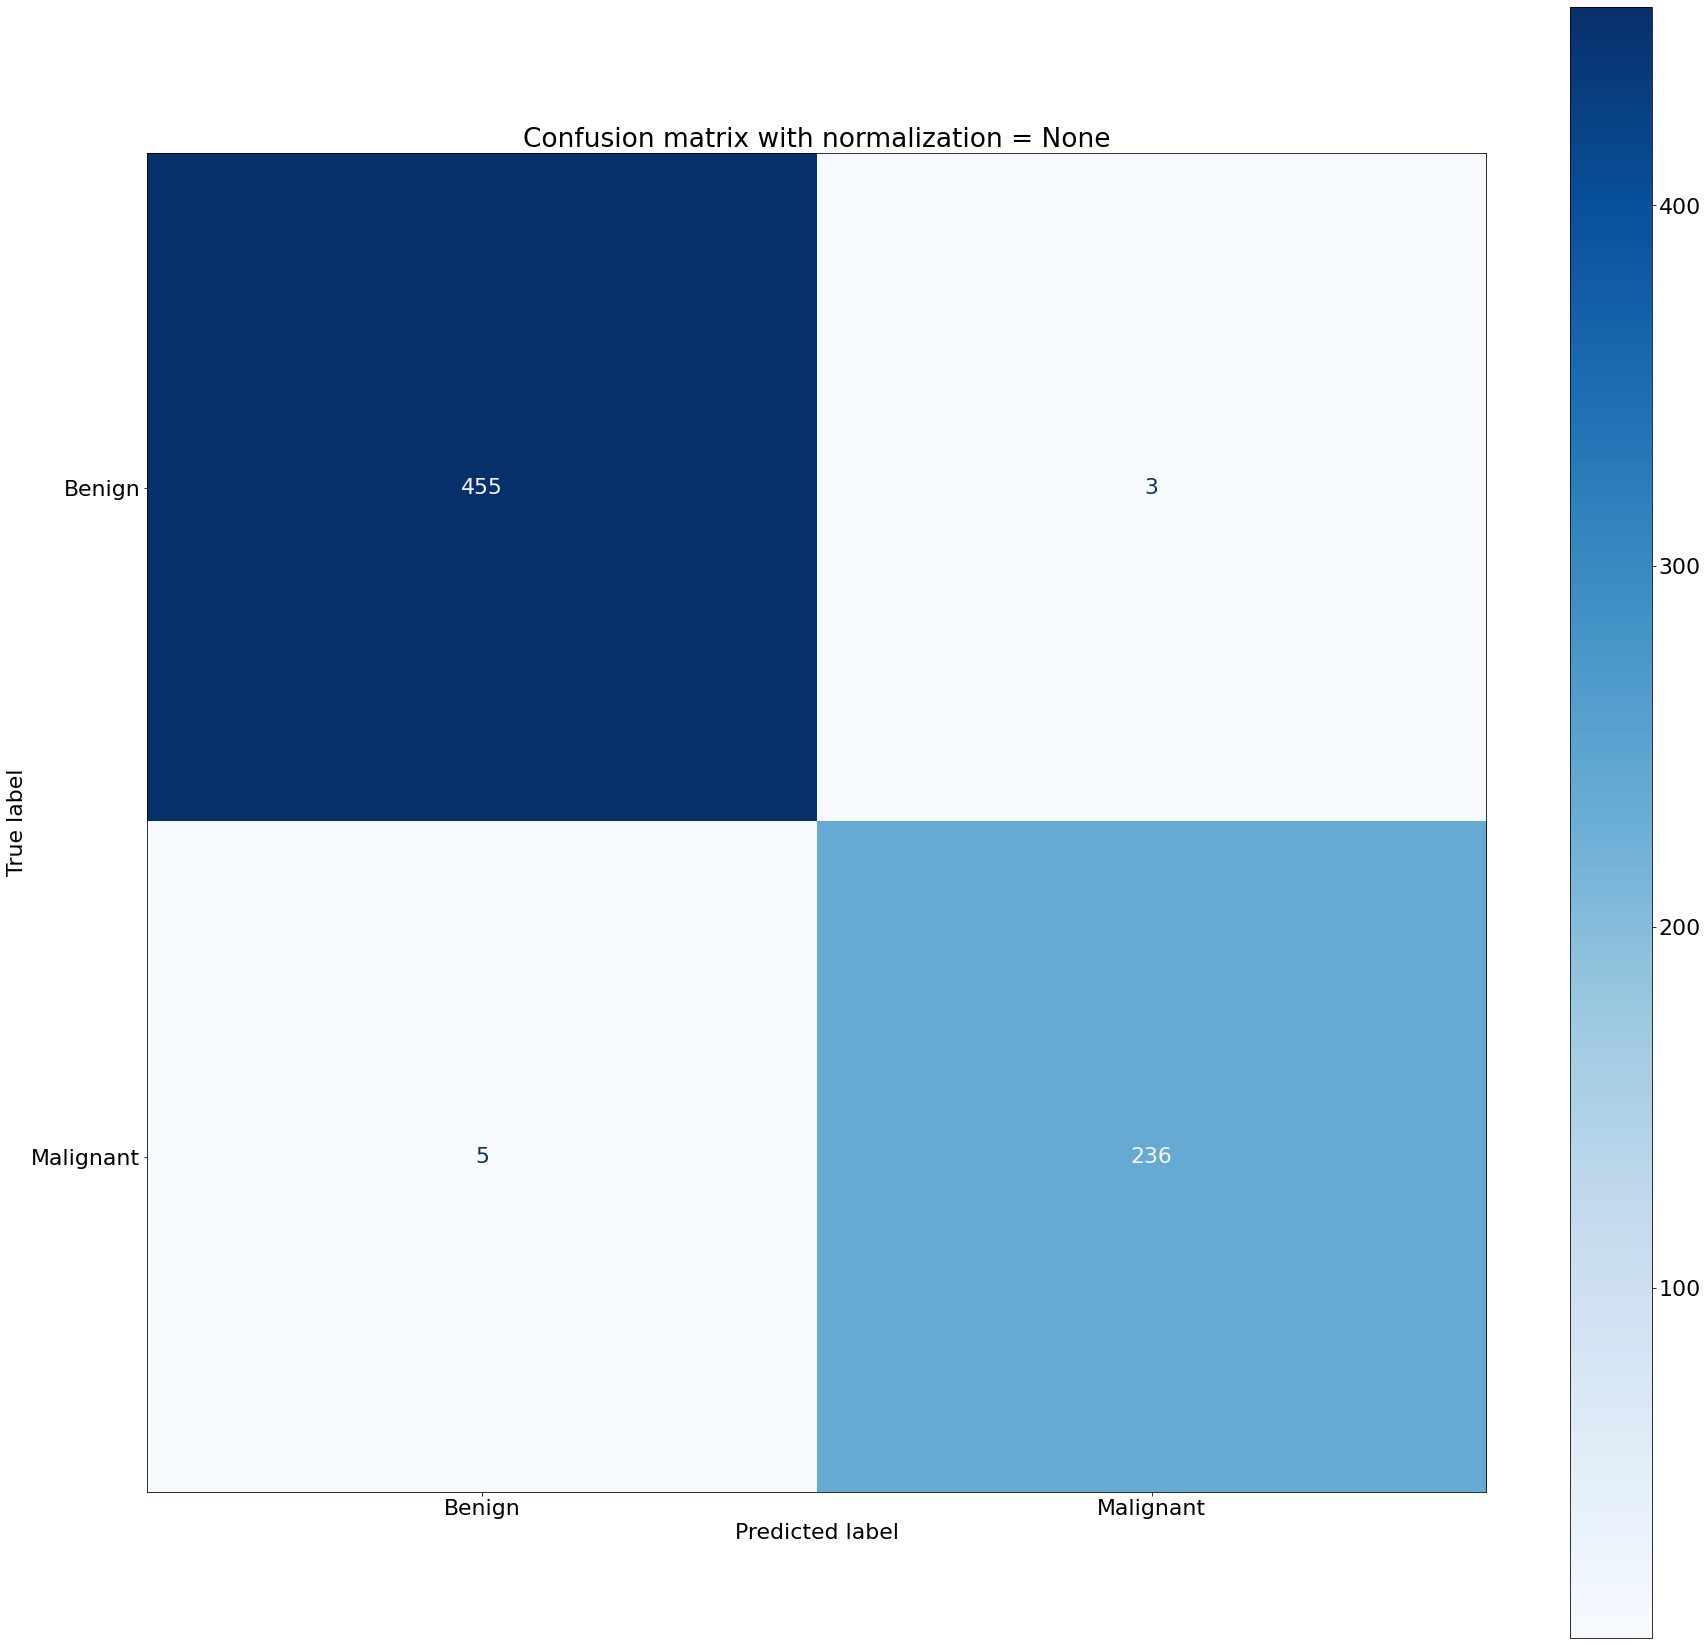

<Figure size 2160x2160 with 0 Axes>

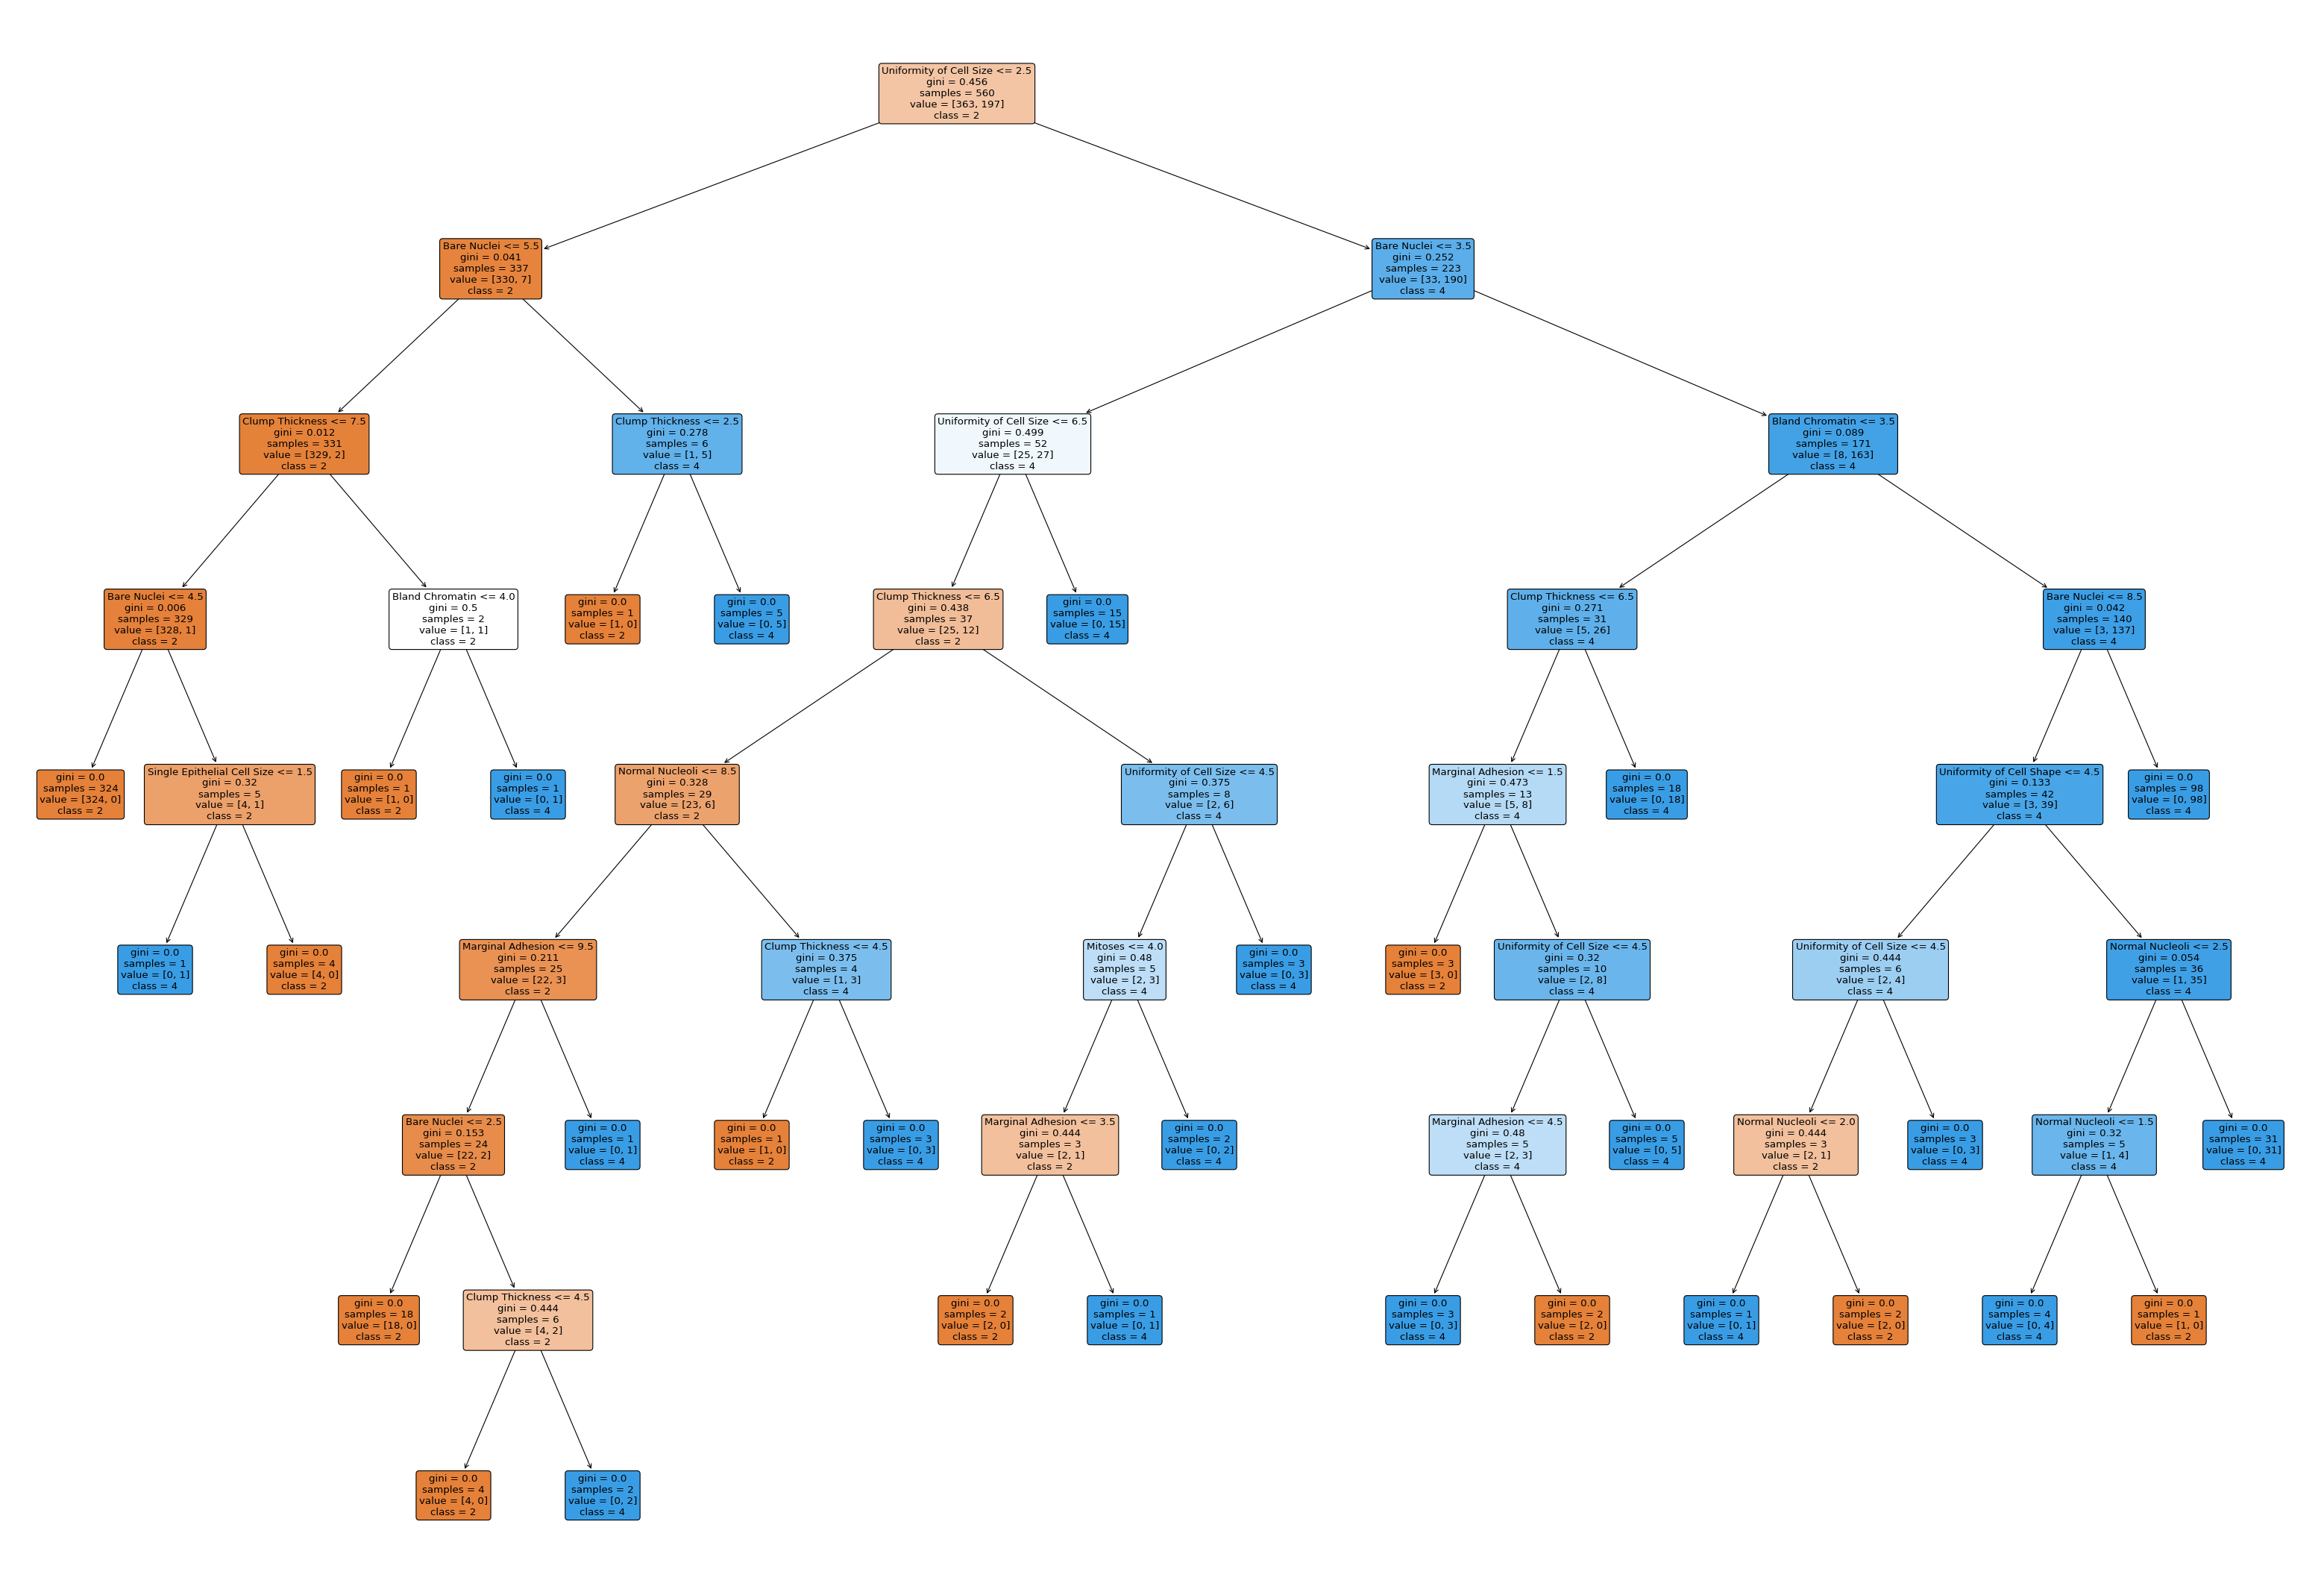

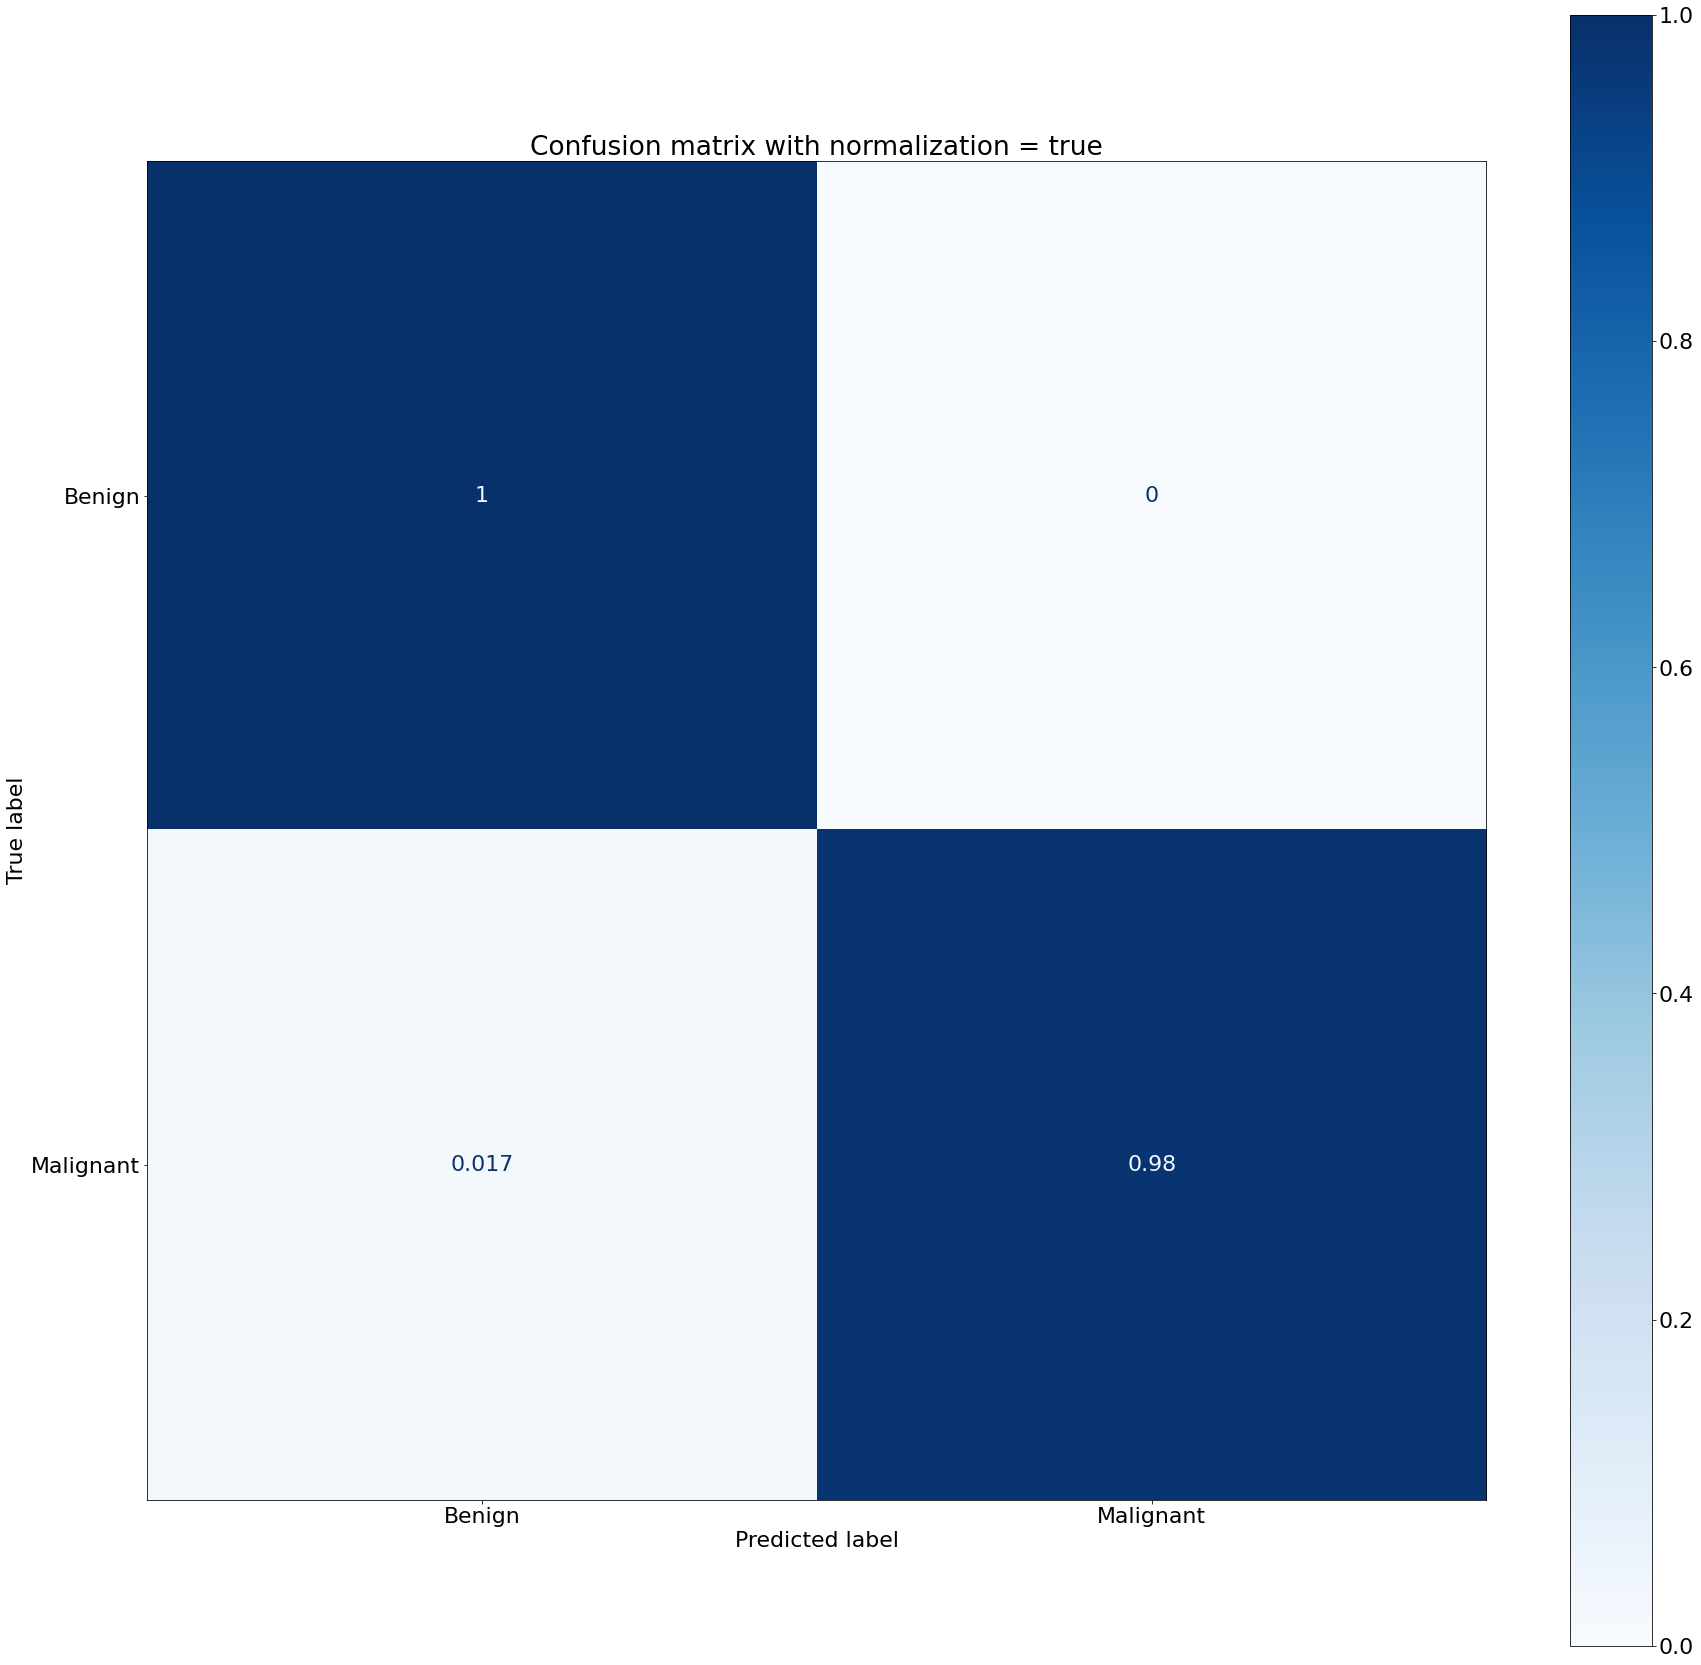

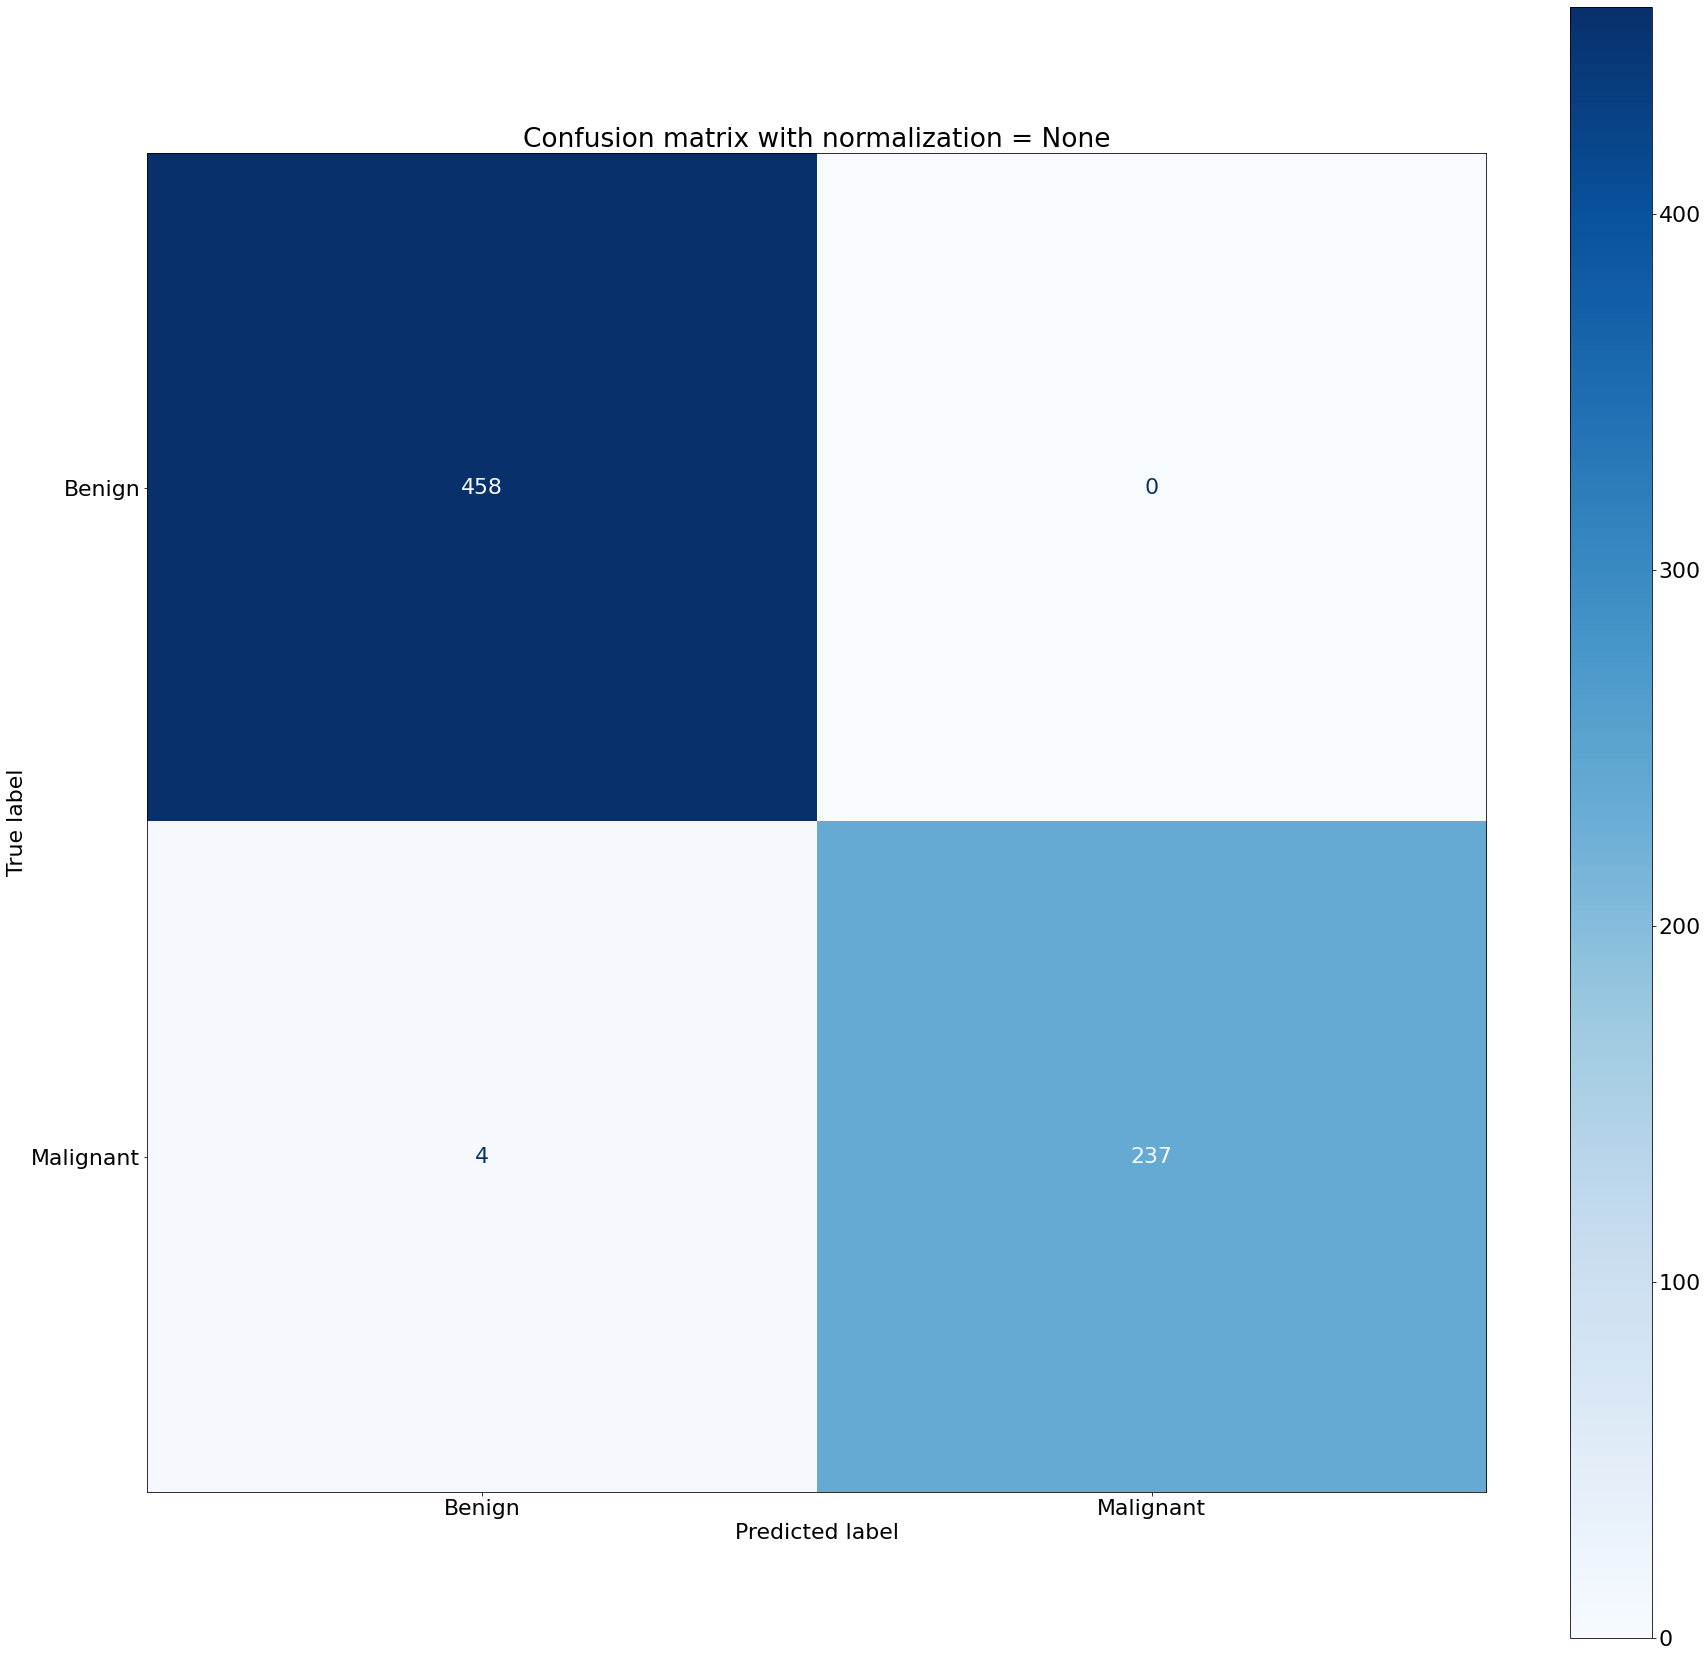

In [73]:
from pandas.plotting import scatter_matrix
from sklearn.model_selection import KFold

#x = tree.plot_tree(clf,feature_names=features,class_names=labels.astype(str),rounded=True,filled=True) 
#now you have to fit k models using the various splits
#after showing that there is isn't much sampling skew you can cross validate this way and choose a tree closest to the 
#mean value above or take a worst case
#note the splitting of folds occurs by randomly, use random state for reproducible results
#define a dataframe to store all the models
models = pd.DataFrame(columns=["score","model"])
# breakpoint()
#loop over all possible models

#shuffle reorders the data for less bias and changes the cross val score from above
kf = KFold(n_splits = 5, shuffle = True, random_state = 0)
i=0
model_scores=[]
print('Average K-Fold Score :' , np.mean(scores)) 
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    x_train = X.iloc[train_index]
    x_test = X.iloc[test_index]
    y_train = Y.iloc[train_index]
    y_test= Y.iloc[test_index]
    
    #train the model
    model = clf.fit(x_train,y_train)
    predictions = clf.predict(x_test)
    print("model score = ",model.score(x_test,y_test))
    model_scores.append(model.score(x_test,y_test))
    # print("prediction score = ", predictions.s)
    #print('Scores from each Iteration: ', scores)
    
    plt.figure()
    #x = tree.plot_tree(model,rounded=True,filled=True,class_names=sorted,feature_names=features)
    # from matplotlib.pyplot import figure
    #width,length
    plt.figure(figsize=(50, 35), dpi=80)
    #label_font = {'size':'36'}
    #title_font = {'size':'21'}  # Adjust to fit
    plt.rcParams.update({'font.size': 22})
    x = tree.plot_tree(clf,rounded=True,filled=True,class_names=sorted,feature_names=features,fontsize=12) 
   # plt.savefig('tree_high_dpi'+str(i), format='eps',bbox_inches = "tight")
    #assign model to dataframe
    models.loc[i] = [model.score(x_test,y_test),model]
    #clf = model
    #increment index in dataframe
    i = i+1
    
    #plot the confusion matrices 1 for normalzied the other un-normalized
    values = ['true',None]
    #cmap='cividis'
    for x in values:
        disp = matrix(clf,X,Y,display_labels=sorted,normalize=x,cmap="Blues")
        disp.ax_.set_title("Confusion matrix with normalization = "+str(x))
        disp.ax_.yaxis.set_ticklabels(['Benign', 'Malignant']);
        disp.ax_.xaxis.set_ticklabels(['Benign', 'Malignant']);
    print(disp.confusion_matrix)
